# Genetic Algorithm Assignment
30% of the overall grade for this module

Marks indciated in sections below are based on percentage of marks allocated for this module

In this assignment you must choose a problem, and attempt to use the Genetic Alogrithm that we developed in class to solve this problem.





## The Problem         **(~30%)**

*   Description of the problem





---

(Double click then ...)  Type Here...

---



*   Discussion of the suitablity of Genetic Algorithms


---

(Double click then ...)  Type Here...

---



*   Complexity of the problem  (Overall marks allocated based on ..)

# The problem and the cost function   **(~20%)**

In [1]:
#imports
import numpy as np
from PIL import Image, ImageDraw
from copy import deepcopy

def create_shape_image(width, height, shape):
    image = Image.new("RGB", (width, height), "black")
    draw = ImageDraw.Draw(image)

    if shape == "circle":
        draw.ellipse([(25, 25), (75, 75)], fill="white", outline ="white")
    elif shape == "square":
        draw.rectangle([(25, 25), (75, 75)], fill="white", outline="white")
    elif shape == "triangle":
        draw.polygon([(50, 25), (25, 75), (75, 75)], fill="white", outline="white")

    return np.array(image)


In [128]:
target_image = Image.fromarray(create_shape_image(50, 50, "circle"))

test = create_random_image(14, 14)
target_image = Image.fromarray(test)
target_image.show()

In [129]:
file_path = './testimgcopy.png'

# Open the image file
with Image.open(file_path) as img:
    # Convert the image to a numpy array
    img_array = np.array(img)
    
test_image = Image.fromarray(img_array[:, :, :3])
test_image.show()
target_image = test_image

In [130]:
def cost_function(individual, target_image):
    return np.mean((individual - target_image) ** 2)
    
def create_random_image(width, height):
    return np.random.randint(0, 255, (width, height, 3), dtype=np.uint8)

class problem:
    def __init__(self):
        self.width = 14
        self.height = 14
        self.number_of_genes = self.width * self.height
        self.cost_function = cost_function


In [39]:
ptest = problem()
ptest.width

10

# The Individual **(~30%)**


*   Chromosone
*   Crossover
*   Mutation



## Discussion and justification on the approaches taken for the above

---

(Double click then ...)  Type Here...

---



In [92]:
# Code for individual class in here


class individual:
    chromosome = None
    cost = 9999999
    number_of_genes = None

    def __init__(self, prob):
        self.chromosome = create_random_image(prob.width, prob.height)
        self.number_of_genes = prob.number_of_genes
        self.cost = prob.cost_function(self.chromosome, target_image)
        
    def mutate(self, mutation_rate, mutation_range):
        for i in range (0, self.number_of_genes):
            random = np.random.uniform()
            
            if random < mutation_rate:
                row_to_mutate = np.random.randint(0, len(self.chromosome))
                pixel_to_mutate = np.random.randint(0, len(self.chromosome[row_to_mutate]))
              

                r_mutation = np.random.uniform(self.chromosome[row_to_mutate][pixel_to_mutate][0] - mutation_range, self.chromosome[row_to_mutate][pixel_to_mutate][0] + mutation_range)
            
                g_mutation = np.random.uniform(self.chromosome[row_to_mutate][pixel_to_mutate][1] - mutation_range, self.chromosome[row_to_mutate][pixel_to_mutate][1] + mutation_range)
             
                b_mutation = np.random.uniform(self.chromosome[row_to_mutate][pixel_to_mutate][2] - mutation_range, self.chromosome[row_to_mutate][pixel_to_mutate][2] + mutation_range)
               
                self.chromosome[row_to_mutate][pixel_to_mutate] = [r_mutation, g_mutation, b_mutation]
            
 
    def crossover(self,parent2):
       
        mid_point = len(self.chromosome) // 2
        # Create child images by swapping halves
        child1 = deepcopy(self)
        child1.chromosome[mid_point:] = parent2.chromosome[mid_point:]

        child2 = deepcopy(parent2)
        child2.chromosome[mid_point:] = self.chromosome[mid_point:]

        return child1, child2
        
        
    
                
            
              

(14, 14, 3)

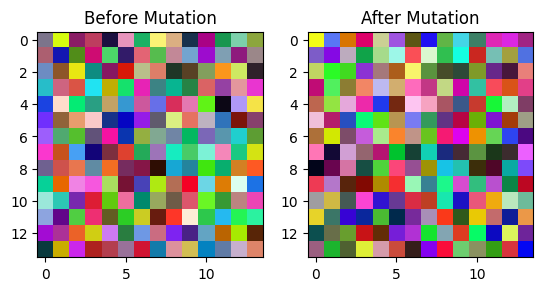

In [132]:
import matplotlib.pyplot as plt
p1 = problem()
ind1 = individual(p1)
img = Image.fromarray(ind1.chromosome, 'RGB')
#show two image plots side by side
fig = plt.figure()
a = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(img)
a.set_title('Before Mutation')

for i in range(0, 100):
    ind1.mutate(1, 25)

img1 = Image.fromarray(ind1.chromosome, 'RGB')

b = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(img1)
b.set_title('After Mutation')

ind1.chromosome.shape

In [134]:
ind2 = individual(p1)
ind3, ind4 = ind1.crossover(ind2)



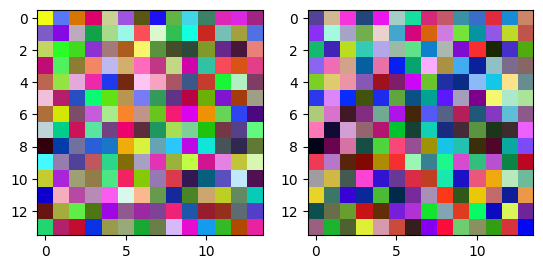

In [135]:
img = Image.fromarray(ind3.chromosome, 'RGB')

fig = plt.figure()
a = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(img)

img1 = Image.fromarray(ind4.chromosome, 'RGB')

b = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(img1)


## Running the algorithm  **(~10%)**

*   Parameter choices
*   Modifications (if any) to run_genetic
*   Rationale for the above



---

(Double click then ...)  Type Here...

---



In [136]:
#  Parameter class here
class parameters:
  def __init__(self):
    self.population  = 1000
    self.number_of_generations = 200
    self.child_rate_per_generation = 1
    self.crossover_explore_rate = 0.5
    self.gene_mutate_rate = 0.5
    self.gene_mutate_range = 80

In [72]:
def choose_indices_from(number_in_list):
  index_1 = np.random.randint(number_in_list)
  index_2 = np.random.randint(number_in_list)
  if index_1 == index_2:
    return choose_indices_from(number_in_list)
  return index_1,index_2

def run_genetic(prob, params):
    cost_function = prob.cost_function
        
    number_in_population = params.population
    max_number_of_generations = params.number_of_generations
    number_of_children_per_generation = params.child_rate_per_generation * number_in_population
    explore_crossover = params.crossover_explore_rate
    gene_mutate_rate = params.gene_mutate_rate
    gene_mutate_range = params.gene_mutate_range
    
    population = []
    
    best_solution = individual(prob)
    best_solution.cost = np.float64('inf')
    for i in range(number_in_population):
        new_individual = individual(prob)
        population.append(new_individual)

        if new_individual.cost < best_solution.cost:
            best_solution = deepcopy(new_individual)


    for _iteration in range(max_number_of_generations):

        children = []
        debug_index = 0
        while len(children) < number_of_children_per_generation:
            
            if debug_index % 250 == 0:
                print(str(debug_index))
                
            debug_index += 1
            parent1_index , parent2_index = choose_indices_from(len(population))
            parent1 = population[parent1_index]
            parent2 = population[parent2_index]

            child1, child2 = parent1.crossover(parent2)
            child1.mutate(gene_mutate_rate, gene_mutate_range)
            child1.cost = cost_function(child1.chromosome, target_image)
            child2.mutate(gene_mutate_rate, gene_mutate_range)
            child2.cost = cost_function(child2.chromosome, target_image)

            # add children in list
            children.append(child1)
            children.append(child2)


        population += children

        population = sorted(population, key = lambda x:x.cost)

        population = population[:number_in_population]

        if population[0].cost < best_solution.cost:
            best_solution = deepcopy(population[0])

        plt.imshow(population[0].chromosome)
        plt.title(f"Generation {_iteration}, Cost: {population[0].cost}")
        plt.show()

        print("Best Solution for iteration " + str(_iteration) + " has cost of " + str (best_solution.cost))
        

    return best_solution

In [137]:
params = parameters()

0
250


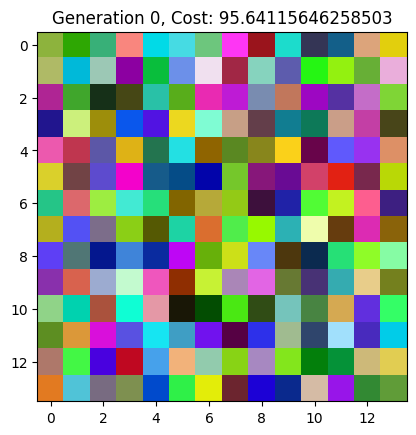

Best Solution for iteration 0 has cost of 95.64115646258503
0
250


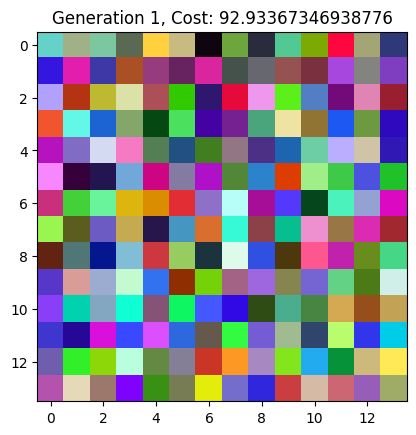

Best Solution for iteration 1 has cost of 92.93367346938776
0
250


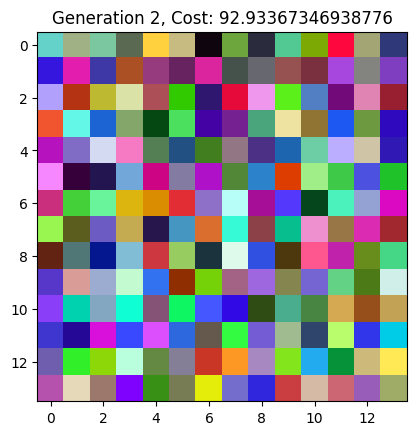

Best Solution for iteration 2 has cost of 92.93367346938776
0
250


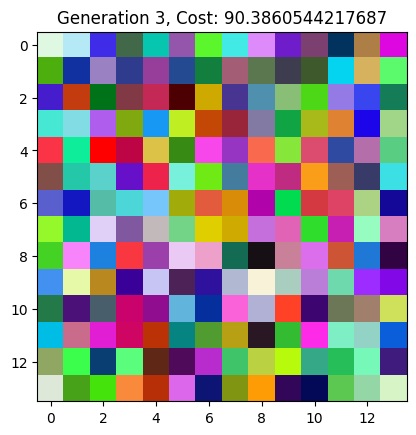

Best Solution for iteration 3 has cost of 90.3860544217687
0
250


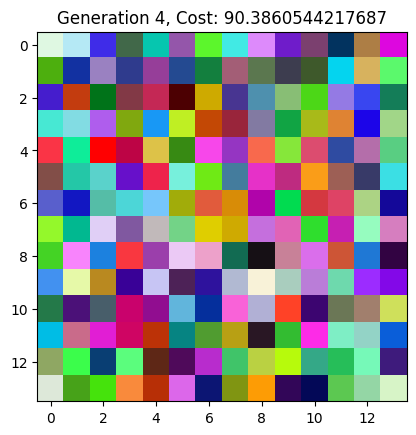

Best Solution for iteration 4 has cost of 90.3860544217687
0
250


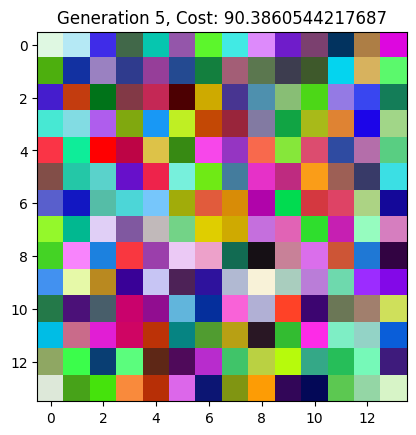

Best Solution for iteration 5 has cost of 90.3860544217687
0
250


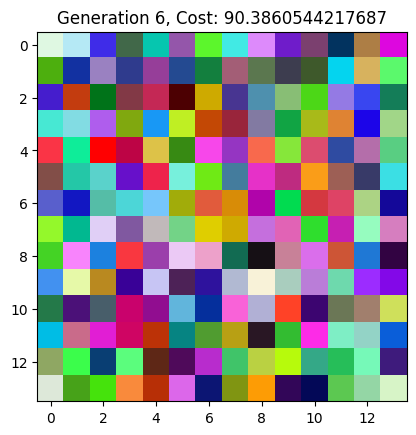

Best Solution for iteration 6 has cost of 90.3860544217687
0
250


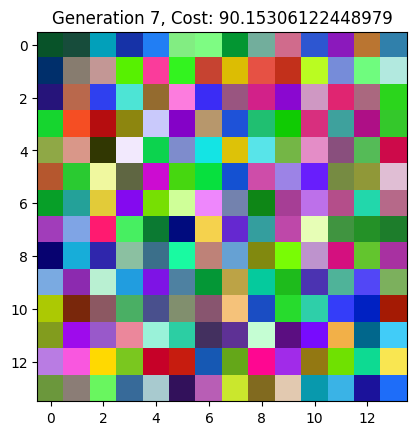

Best Solution for iteration 7 has cost of 90.15306122448979
0
250


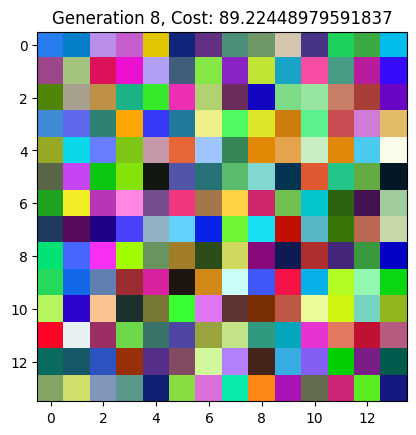

Best Solution for iteration 8 has cost of 89.22448979591837
0
250


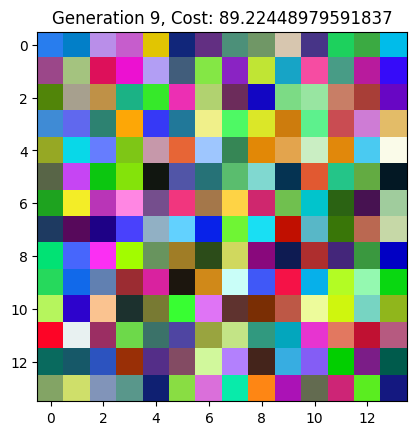

Best Solution for iteration 9 has cost of 89.22448979591837
0
250


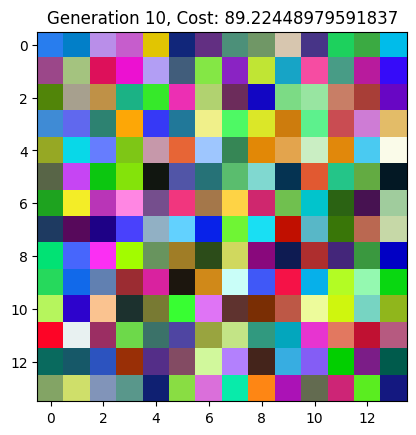

Best Solution for iteration 10 has cost of 89.22448979591837
0
250


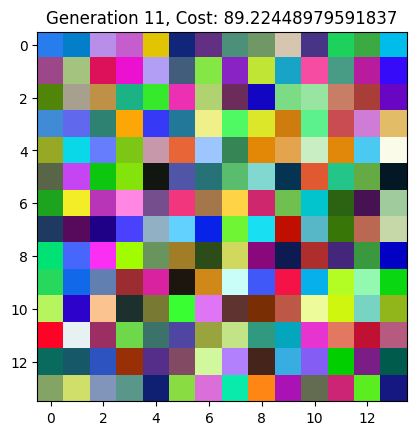

Best Solution for iteration 11 has cost of 89.22448979591837
0
250


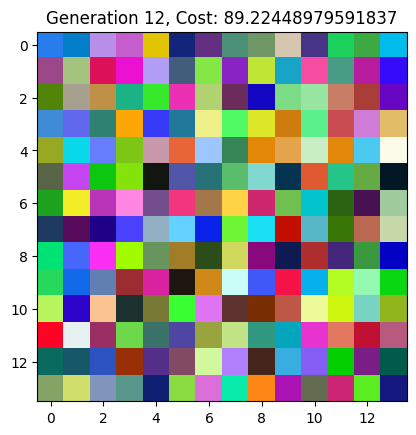

Best Solution for iteration 12 has cost of 89.22448979591837
0
250


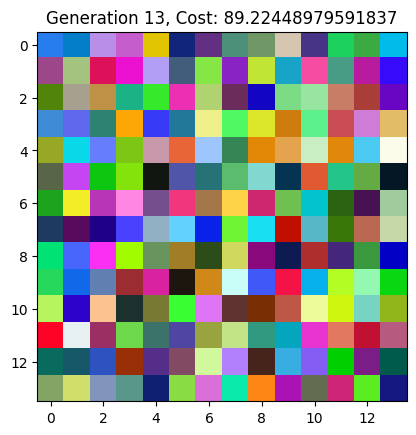

Best Solution for iteration 13 has cost of 89.22448979591837
0
250


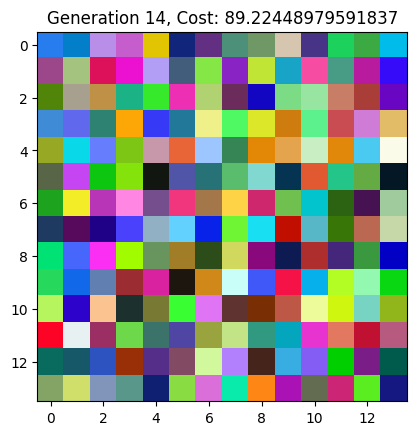

Best Solution for iteration 14 has cost of 89.22448979591837
0
250


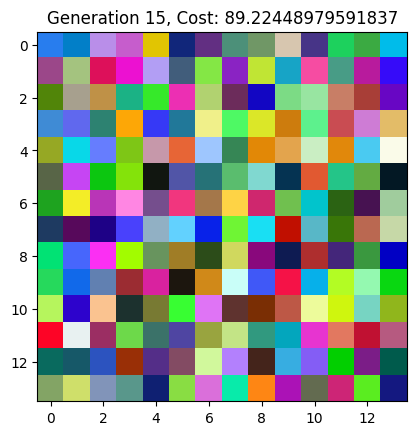

Best Solution for iteration 15 has cost of 89.22448979591837
0
250


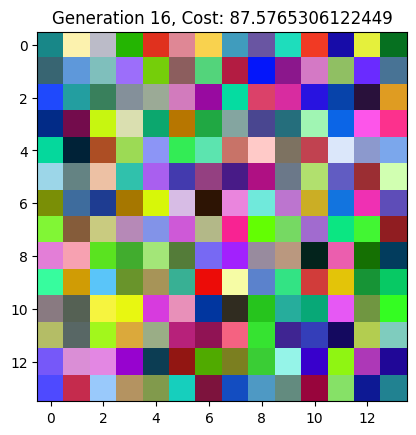

Best Solution for iteration 16 has cost of 87.5765306122449
0
250


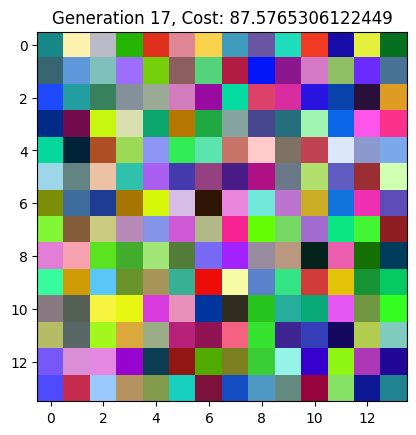

Best Solution for iteration 17 has cost of 87.5765306122449
0
250


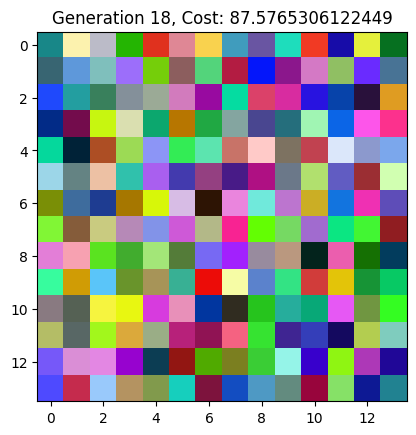

Best Solution for iteration 18 has cost of 87.5765306122449
0
250


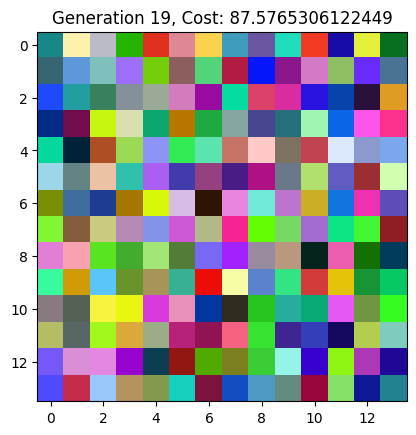

Best Solution for iteration 19 has cost of 87.5765306122449
0
250


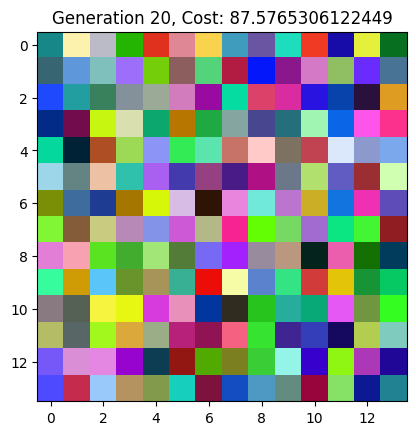

Best Solution for iteration 20 has cost of 87.5765306122449
0
250


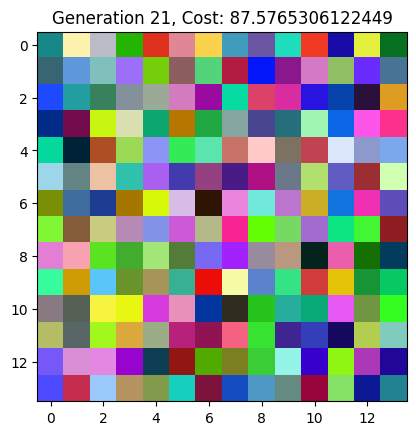

Best Solution for iteration 21 has cost of 87.5765306122449
0
250


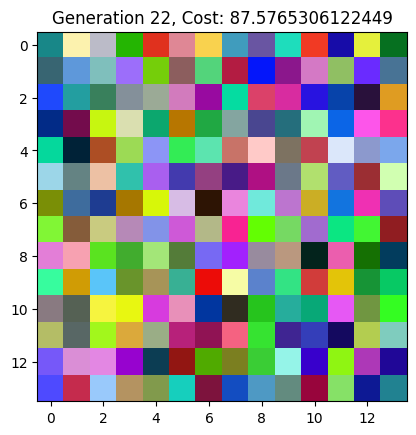

Best Solution for iteration 22 has cost of 87.5765306122449
0
250


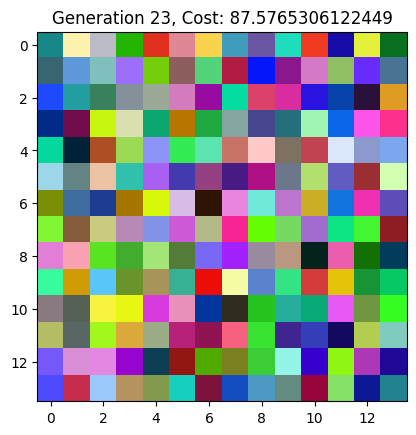

Best Solution for iteration 23 has cost of 87.5765306122449
0
250


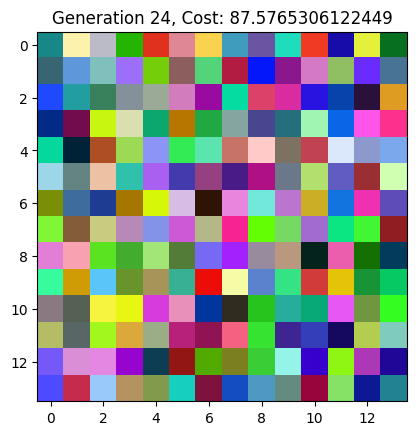

Best Solution for iteration 24 has cost of 87.5765306122449
0
250


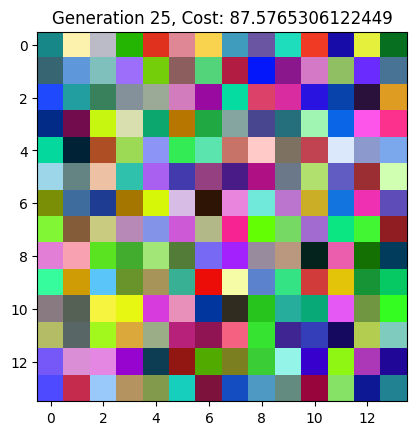

Best Solution for iteration 25 has cost of 87.5765306122449
0
250


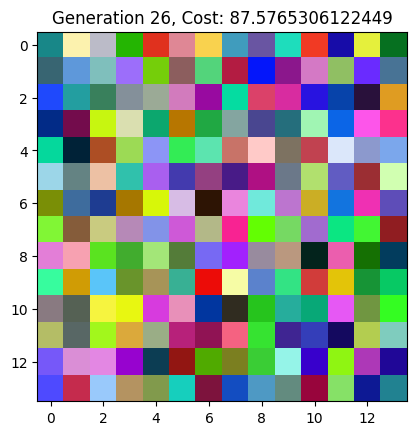

Best Solution for iteration 26 has cost of 87.5765306122449
0
250


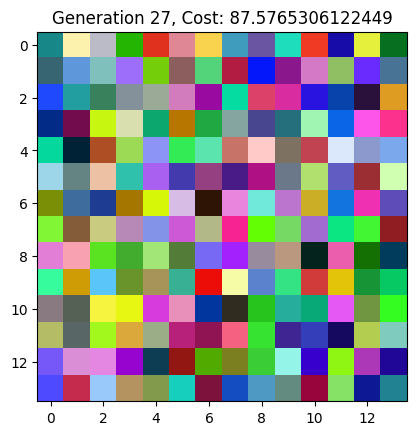

Best Solution for iteration 27 has cost of 87.5765306122449
0
250


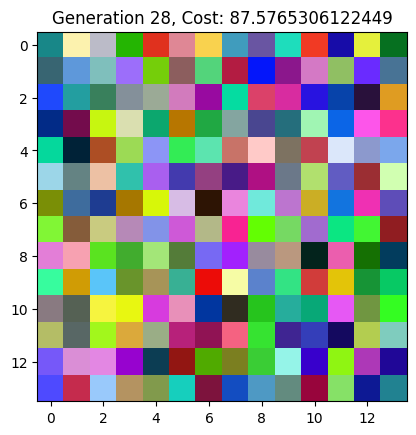

Best Solution for iteration 28 has cost of 87.5765306122449
0
250


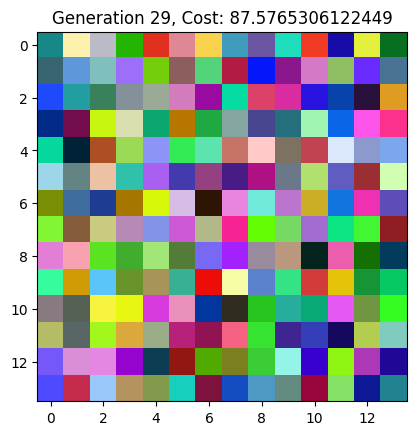

Best Solution for iteration 29 has cost of 87.5765306122449
0
250


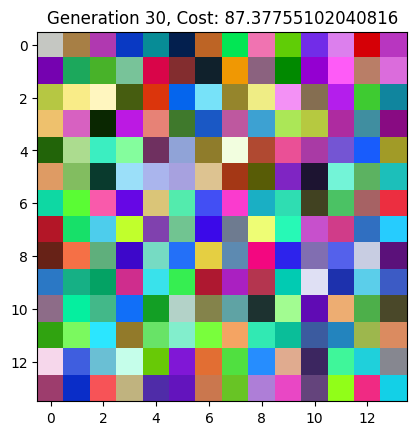

Best Solution for iteration 30 has cost of 87.37755102040816
0
250


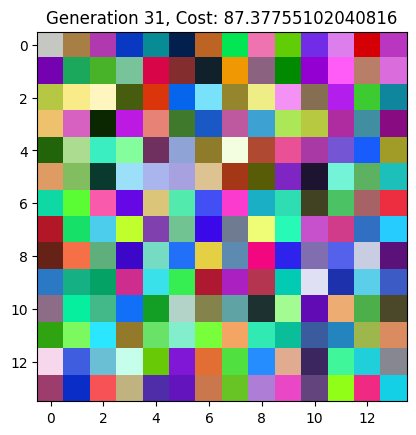

Best Solution for iteration 31 has cost of 87.37755102040816
0
250


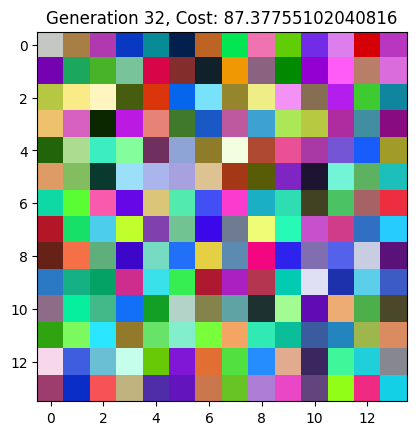

Best Solution for iteration 32 has cost of 87.37755102040816
0
250


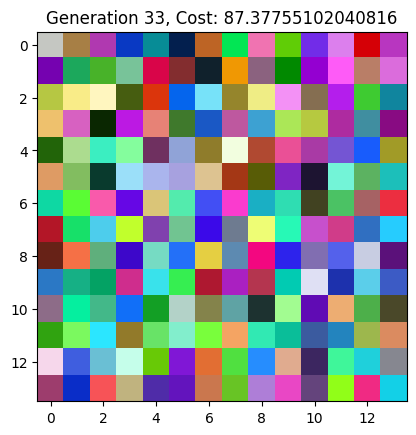

Best Solution for iteration 33 has cost of 87.37755102040816
0
250


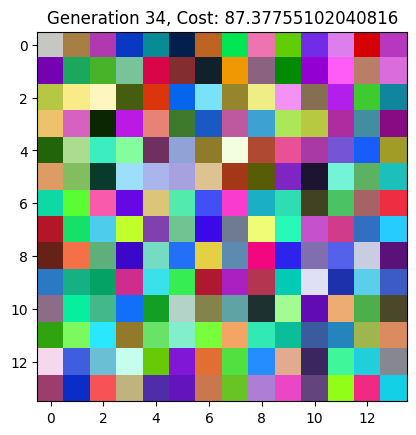

Best Solution for iteration 34 has cost of 87.37755102040816
0
250


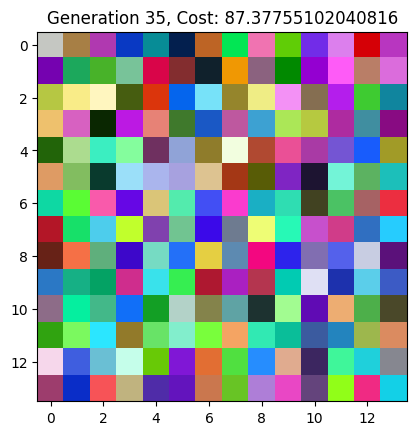

Best Solution for iteration 35 has cost of 87.37755102040816
0
250


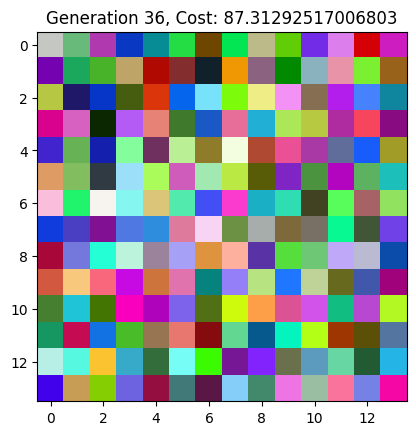

Best Solution for iteration 36 has cost of 87.31292517006803
0
250


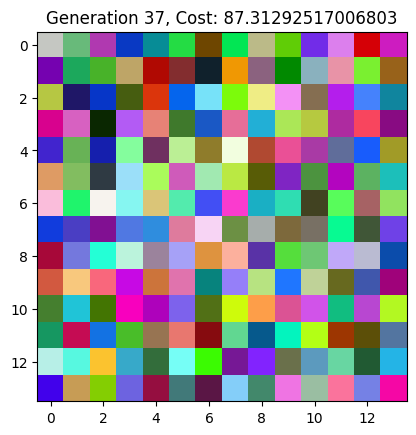

Best Solution for iteration 37 has cost of 87.31292517006803
0
250


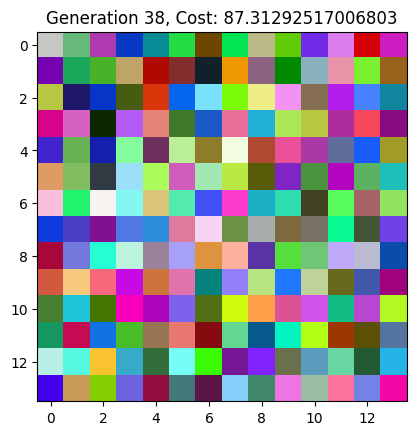

Best Solution for iteration 38 has cost of 87.31292517006803
0
250


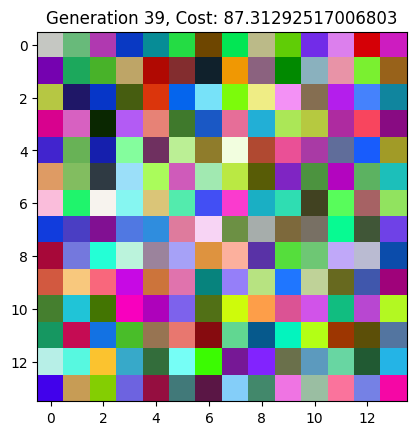

Best Solution for iteration 39 has cost of 87.31292517006803
0
250


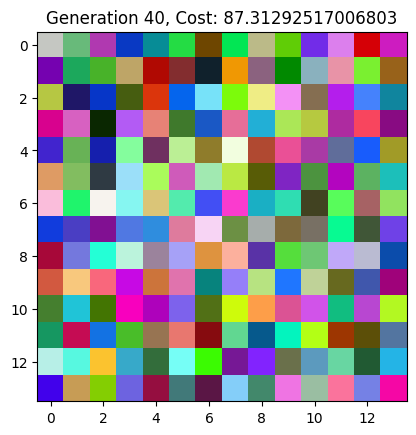

Best Solution for iteration 40 has cost of 87.31292517006803
0
250


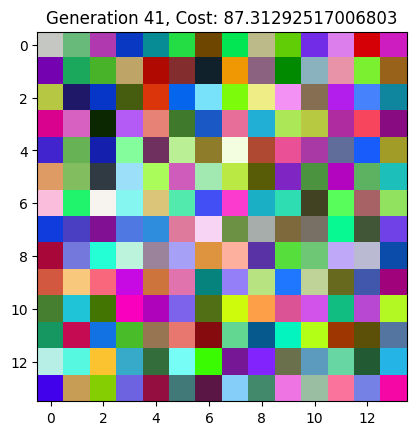

Best Solution for iteration 41 has cost of 87.31292517006803
0
250


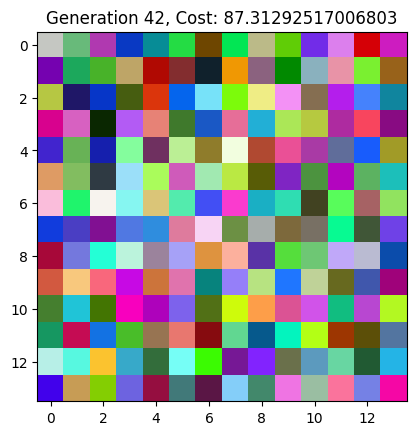

Best Solution for iteration 42 has cost of 87.31292517006803
0
250


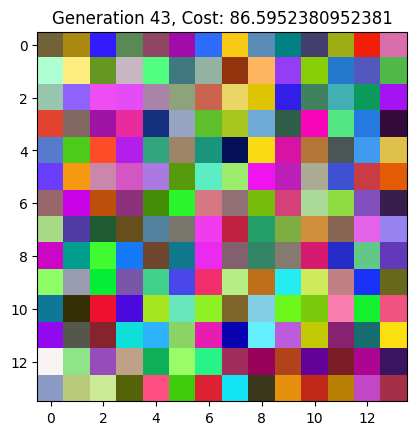

Best Solution for iteration 43 has cost of 86.5952380952381
0
250


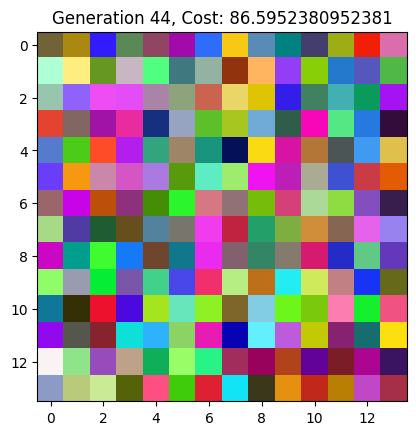

Best Solution for iteration 44 has cost of 86.5952380952381
0
250


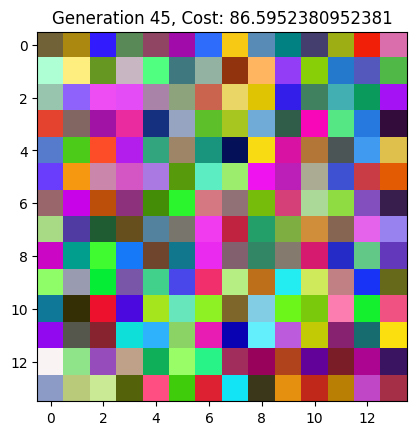

Best Solution for iteration 45 has cost of 86.5952380952381
0
250


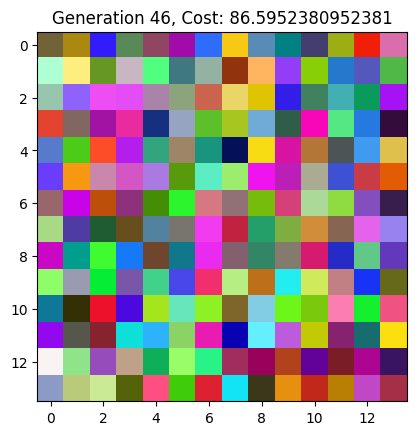

Best Solution for iteration 46 has cost of 86.5952380952381
0
250


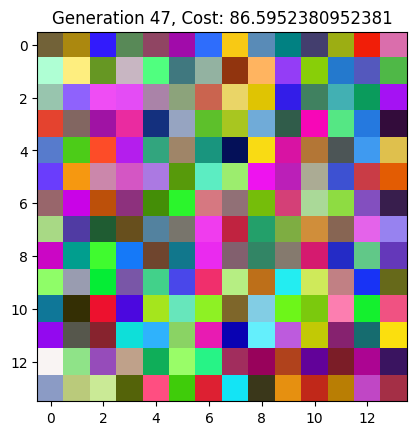

Best Solution for iteration 47 has cost of 86.5952380952381
0
250


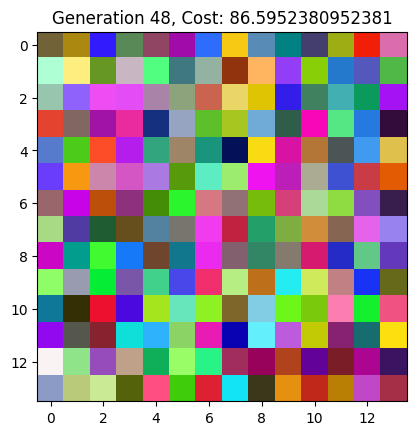

Best Solution for iteration 48 has cost of 86.5952380952381
0
250


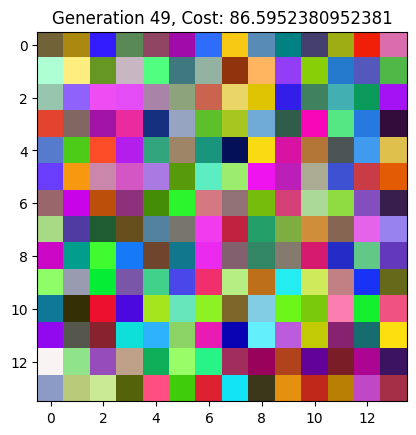

Best Solution for iteration 49 has cost of 86.5952380952381
0
250


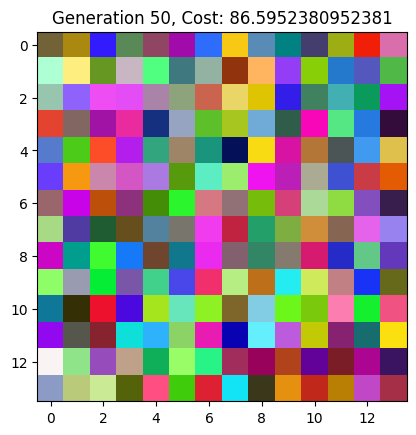

Best Solution for iteration 50 has cost of 86.5952380952381
0
250


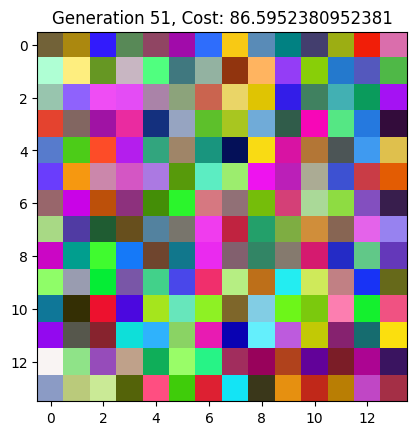

Best Solution for iteration 51 has cost of 86.5952380952381
0
250


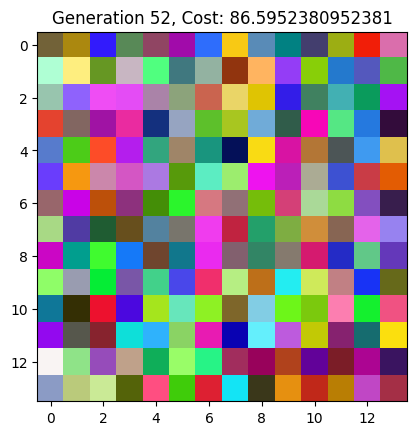

Best Solution for iteration 52 has cost of 86.5952380952381
0
250


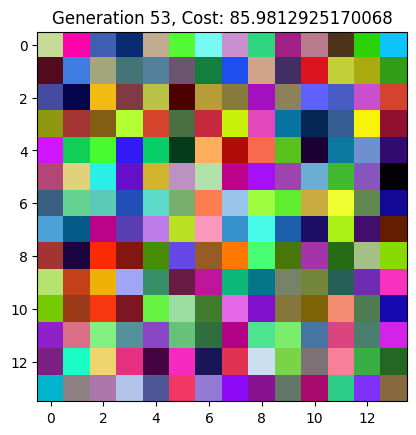

Best Solution for iteration 53 has cost of 85.9812925170068
0
250


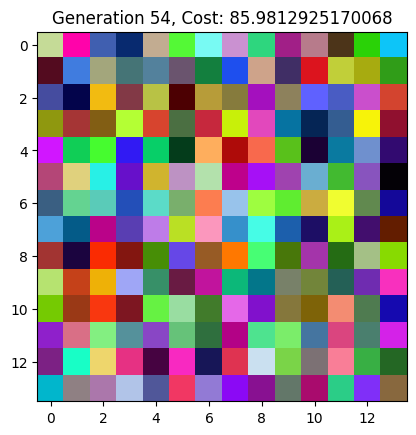

Best Solution for iteration 54 has cost of 85.9812925170068
0
250


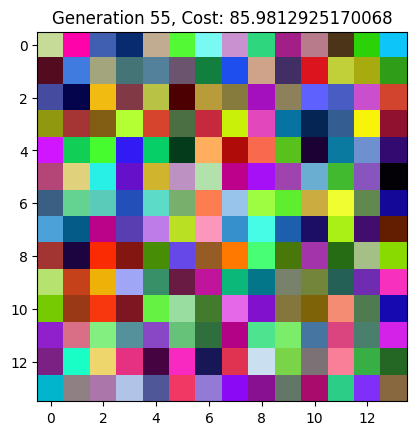

Best Solution for iteration 55 has cost of 85.9812925170068
0
250


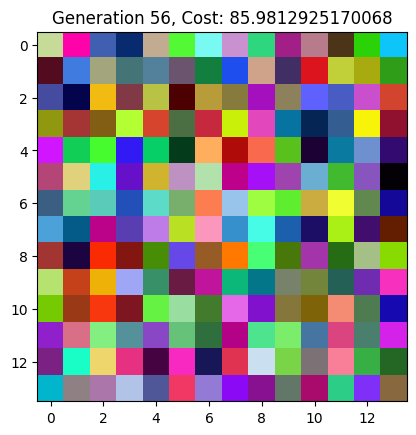

Best Solution for iteration 56 has cost of 85.9812925170068
0
250


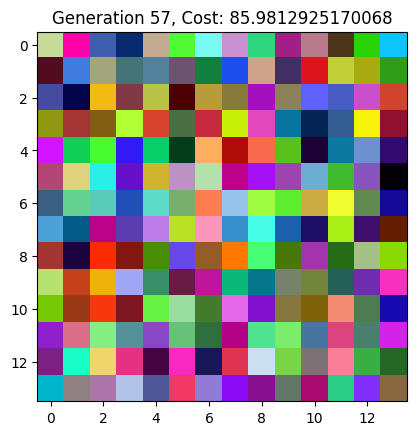

Best Solution for iteration 57 has cost of 85.9812925170068
0
250


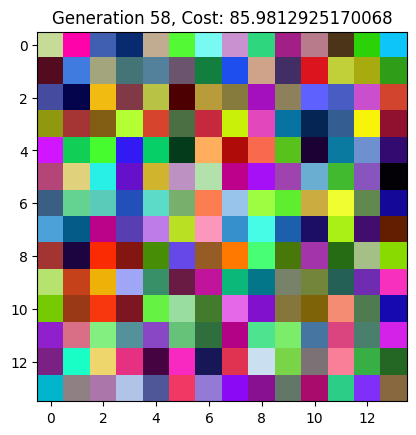

Best Solution for iteration 58 has cost of 85.9812925170068
0
250


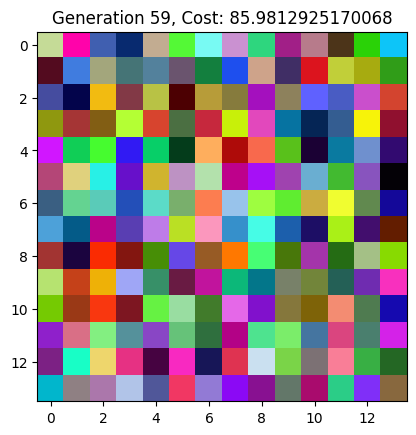

Best Solution for iteration 59 has cost of 85.9812925170068
0
250


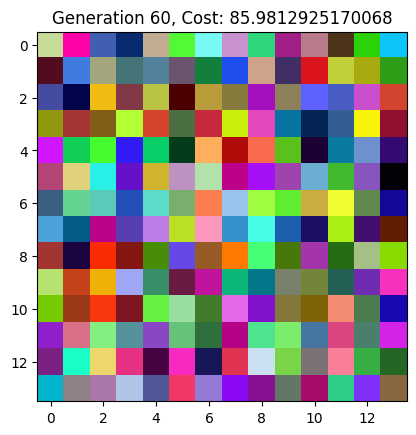

Best Solution for iteration 60 has cost of 85.9812925170068
0
250


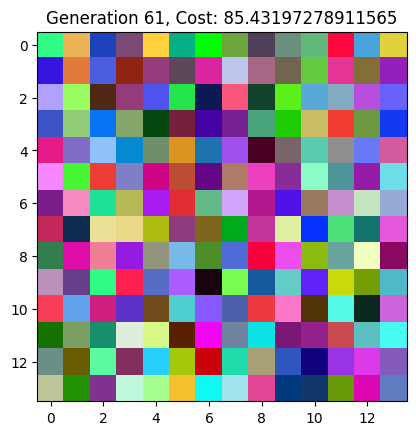

Best Solution for iteration 61 has cost of 85.43197278911565
0
250


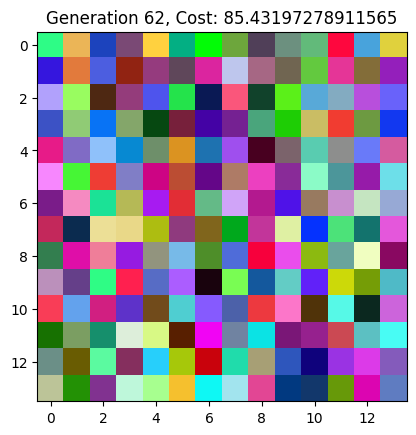

Best Solution for iteration 62 has cost of 85.43197278911565
0
250


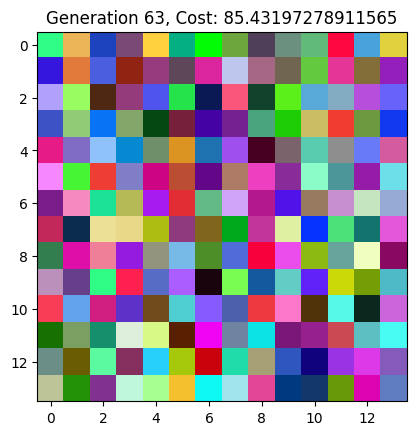

Best Solution for iteration 63 has cost of 85.43197278911565
0
250


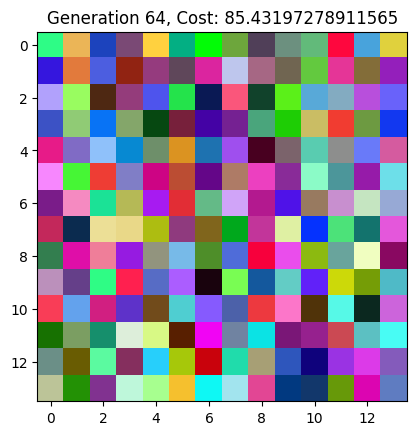

Best Solution for iteration 64 has cost of 85.43197278911565
0
250


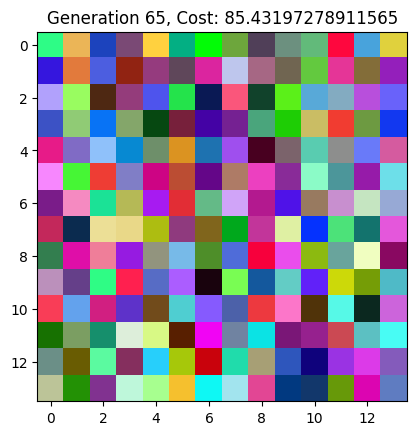

Best Solution for iteration 65 has cost of 85.43197278911565
0
250


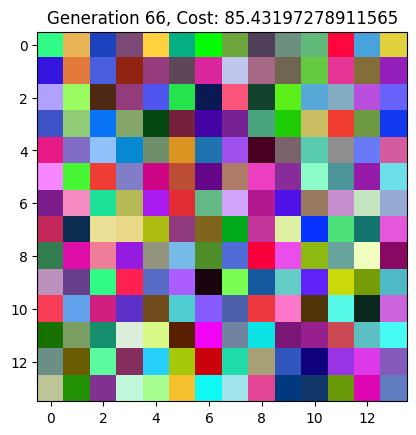

Best Solution for iteration 66 has cost of 85.43197278911565
0
250


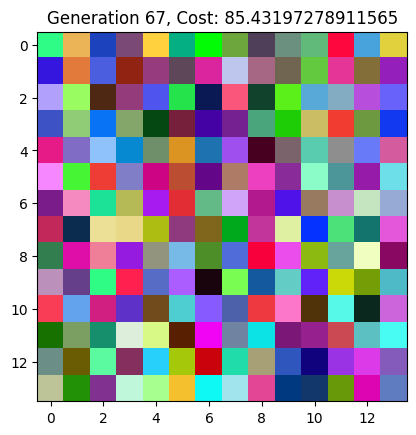

Best Solution for iteration 67 has cost of 85.43197278911565
0
250


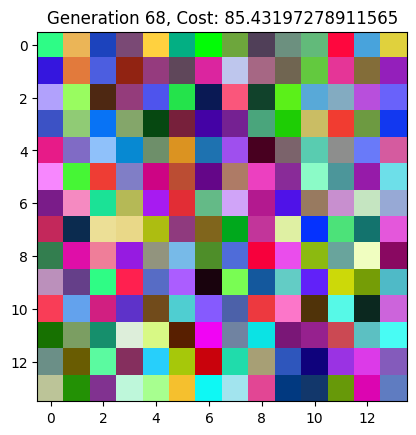

Best Solution for iteration 68 has cost of 85.43197278911565
0
250


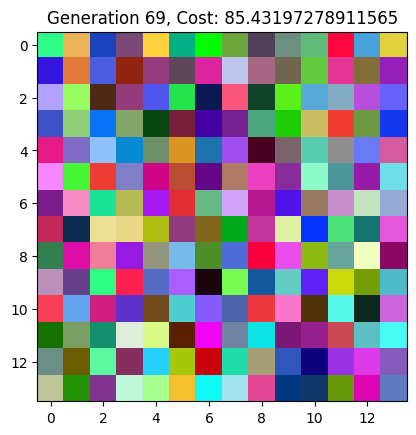

Best Solution for iteration 69 has cost of 85.43197278911565
0
250


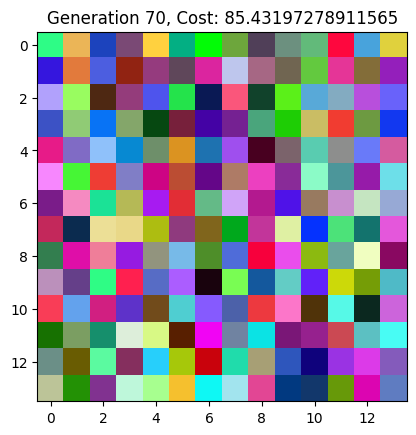

Best Solution for iteration 70 has cost of 85.43197278911565
0
250


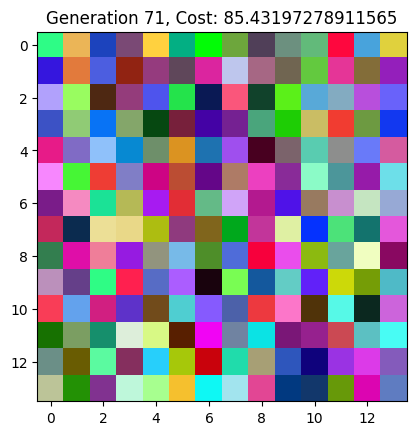

Best Solution for iteration 71 has cost of 85.43197278911565
0
250


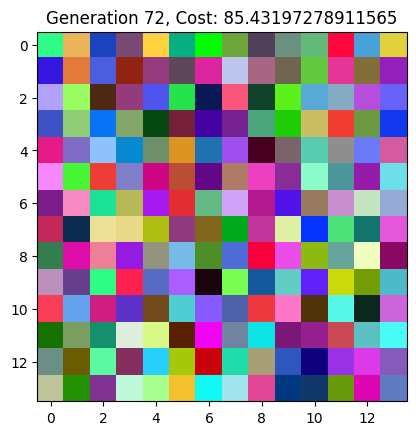

Best Solution for iteration 72 has cost of 85.43197278911565
0
250


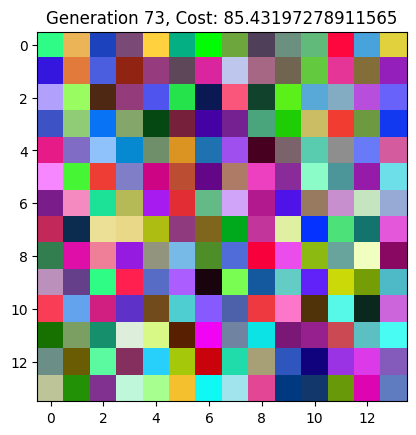

Best Solution for iteration 73 has cost of 85.43197278911565
0
250


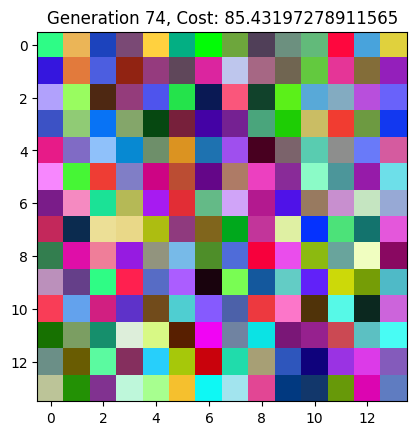

Best Solution for iteration 74 has cost of 85.43197278911565
0
250


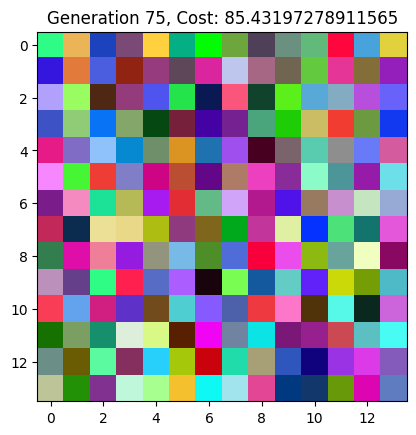

Best Solution for iteration 75 has cost of 85.43197278911565
0
250


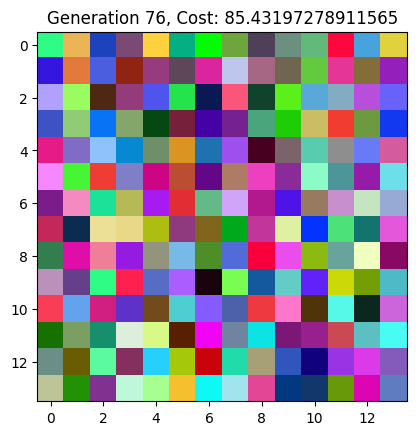

Best Solution for iteration 76 has cost of 85.43197278911565
0
250


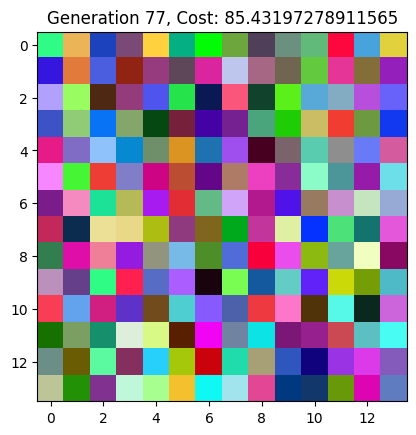

Best Solution for iteration 77 has cost of 85.43197278911565
0
250


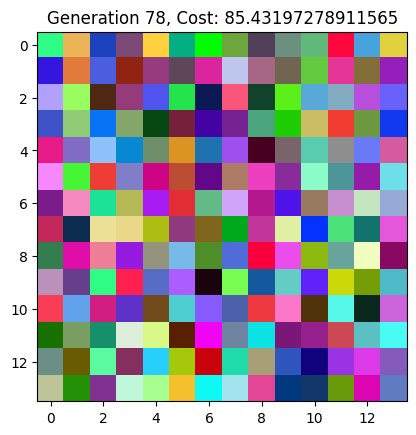

Best Solution for iteration 78 has cost of 85.43197278911565
0
250


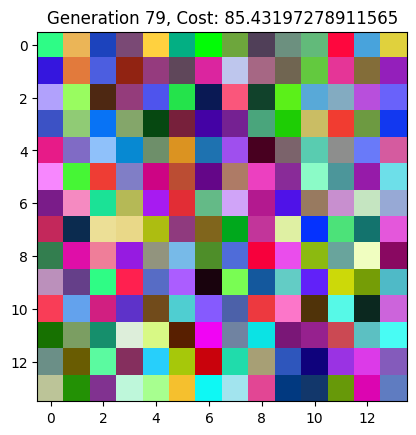

Best Solution for iteration 79 has cost of 85.43197278911565
0
250


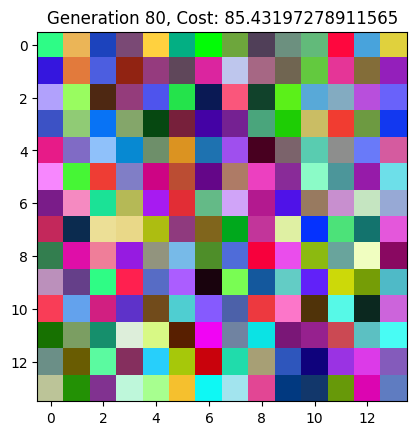

Best Solution for iteration 80 has cost of 85.43197278911565
0
250


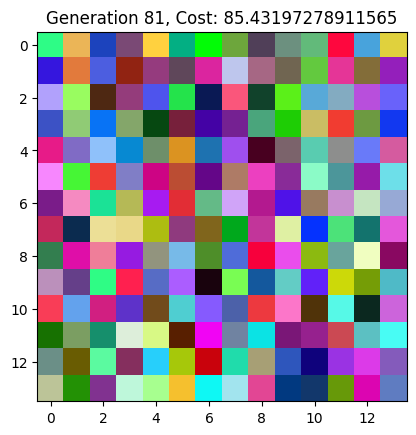

Best Solution for iteration 81 has cost of 85.43197278911565
0
250


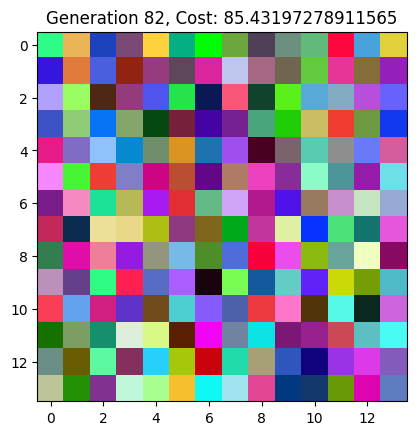

Best Solution for iteration 82 has cost of 85.43197278911565
0
250


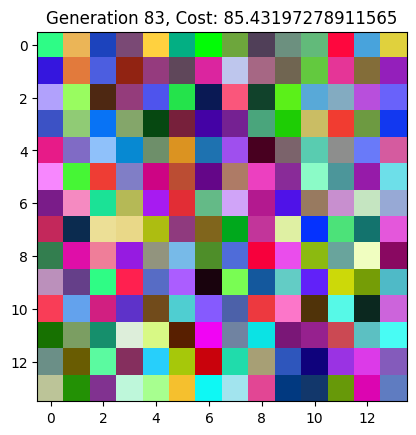

Best Solution for iteration 83 has cost of 85.43197278911565
0
250


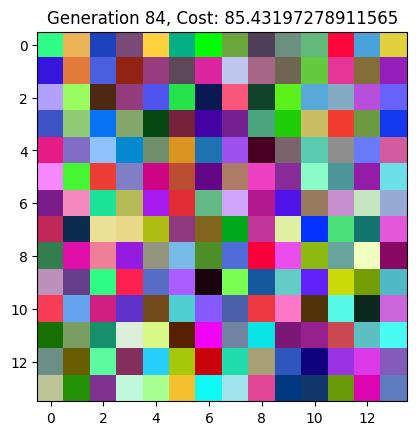

Best Solution for iteration 84 has cost of 85.43197278911565
0
250


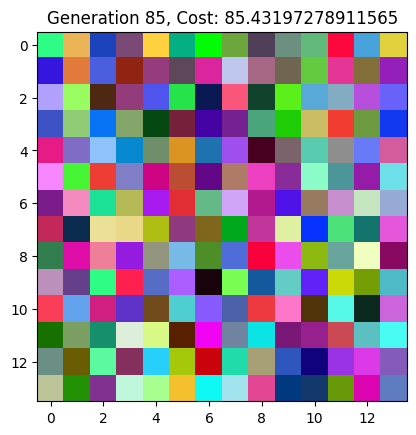

Best Solution for iteration 85 has cost of 85.43197278911565
0
250


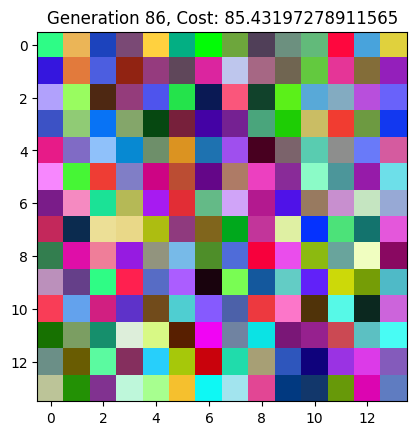

Best Solution for iteration 86 has cost of 85.43197278911565
0
250


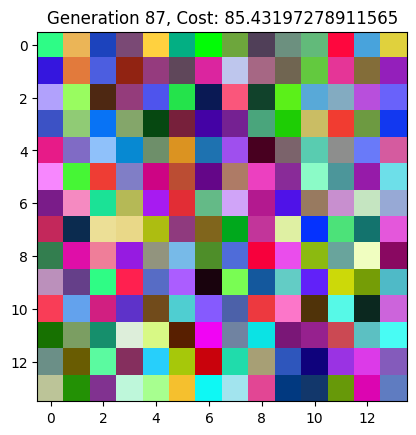

Best Solution for iteration 87 has cost of 85.43197278911565
0
250


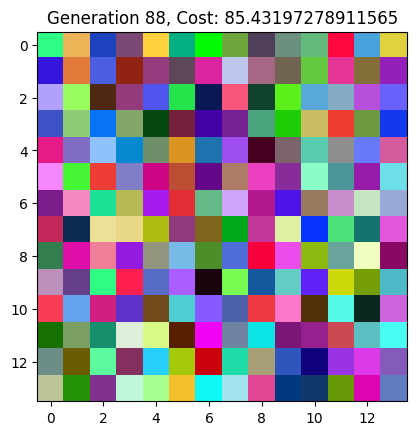

Best Solution for iteration 88 has cost of 85.43197278911565
0
250


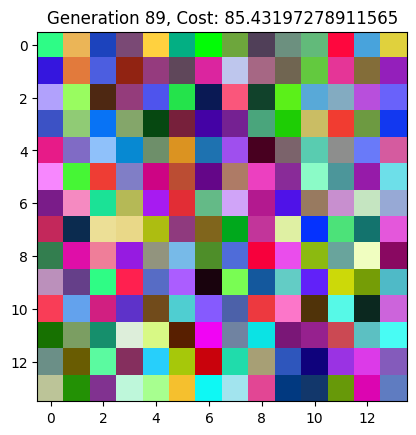

Best Solution for iteration 89 has cost of 85.43197278911565
0
250


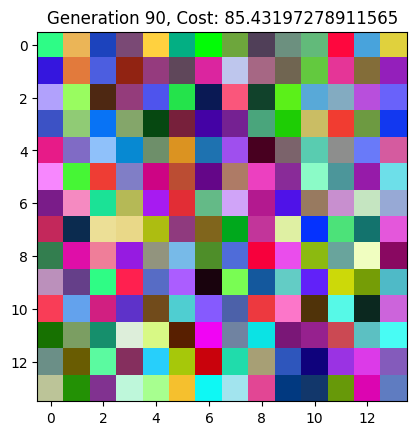

Best Solution for iteration 90 has cost of 85.43197278911565
0
250


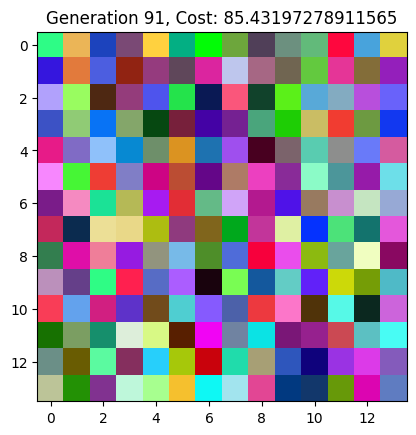

Best Solution for iteration 91 has cost of 85.43197278911565
0
250


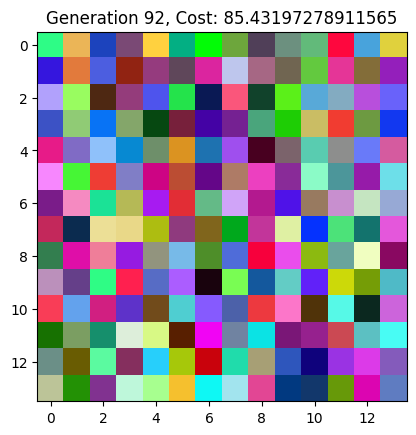

Best Solution for iteration 92 has cost of 85.43197278911565
0
250


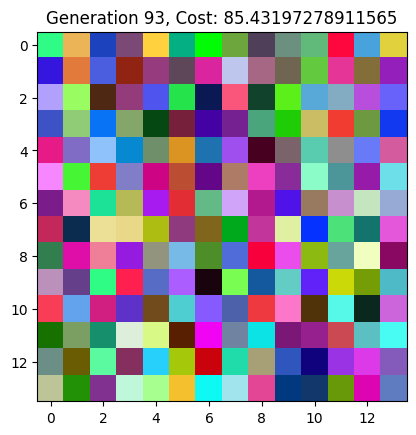

Best Solution for iteration 93 has cost of 85.43197278911565
0
250


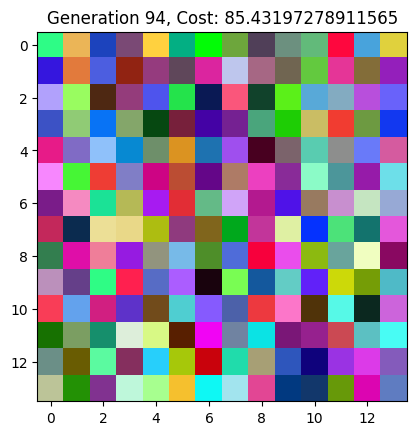

Best Solution for iteration 94 has cost of 85.43197278911565
0
250


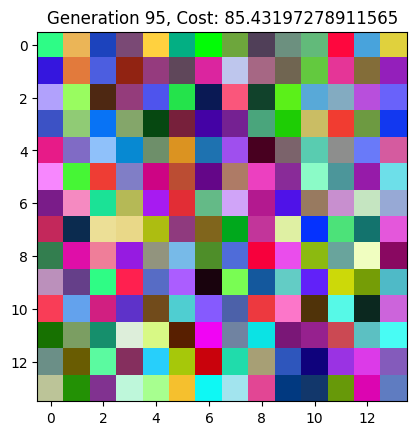

Best Solution for iteration 95 has cost of 85.43197278911565
0
250


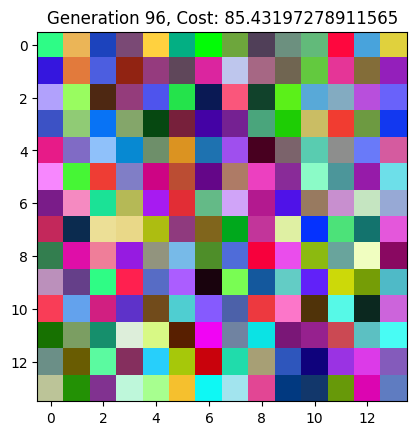

Best Solution for iteration 96 has cost of 85.43197278911565
0
250


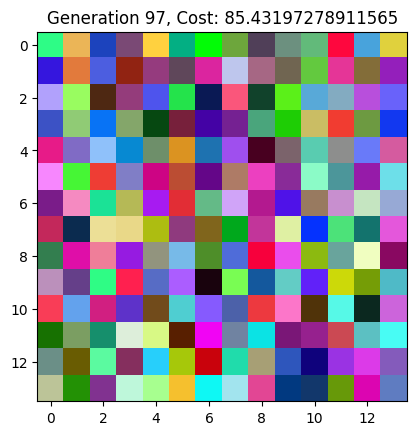

Best Solution for iteration 97 has cost of 85.43197278911565
0
250


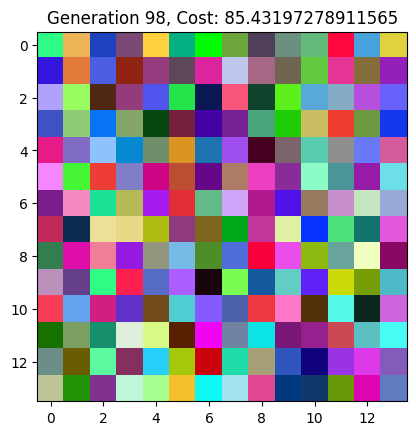

Best Solution for iteration 98 has cost of 85.43197278911565
0
250


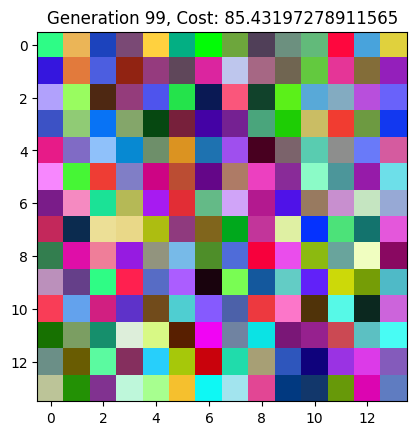

Best Solution for iteration 99 has cost of 85.43197278911565
0
250


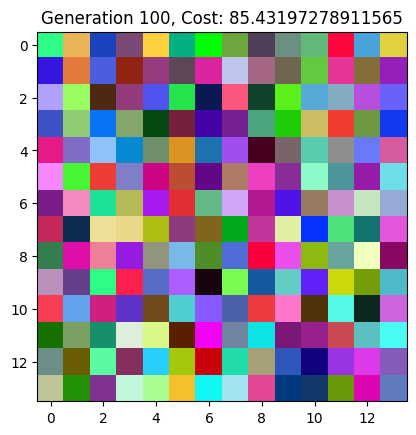

Best Solution for iteration 100 has cost of 85.43197278911565
0
250


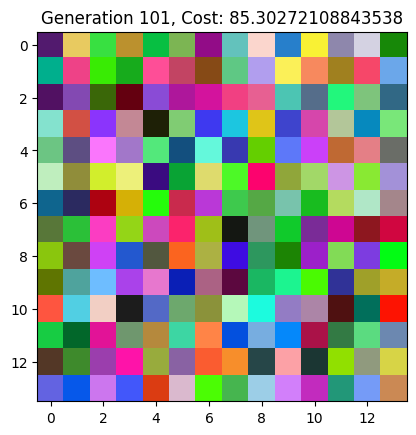

Best Solution for iteration 101 has cost of 85.30272108843538
0
250


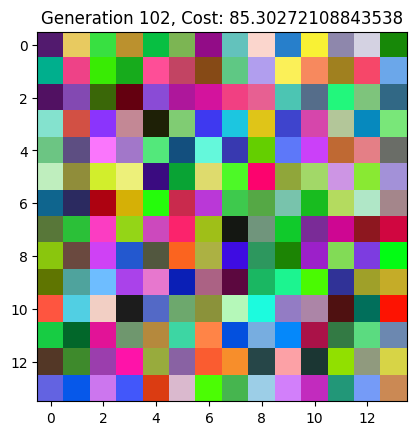

Best Solution for iteration 102 has cost of 85.30272108843538
0
250


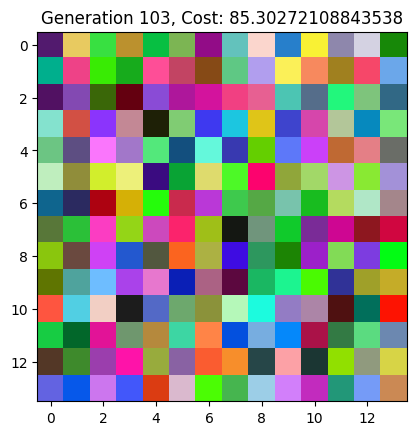

Best Solution for iteration 103 has cost of 85.30272108843538
0
250


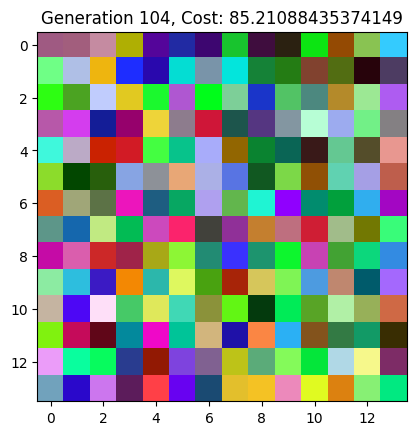

Best Solution for iteration 104 has cost of 85.21088435374149
0
250


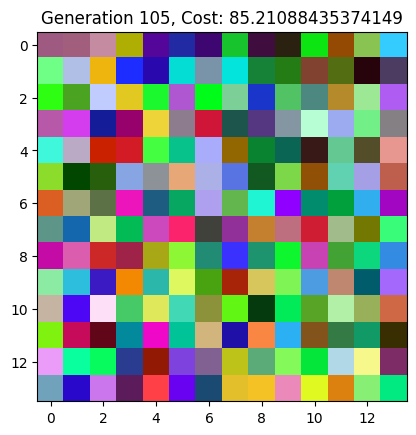

Best Solution for iteration 105 has cost of 85.21088435374149
0
250


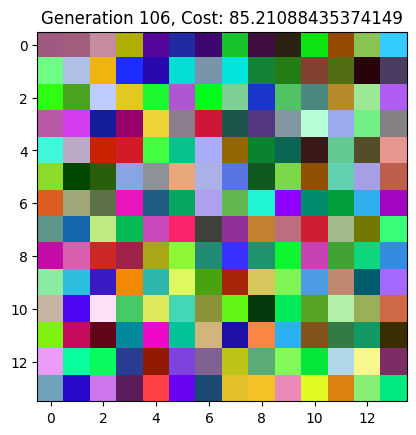

Best Solution for iteration 106 has cost of 85.21088435374149
0
250


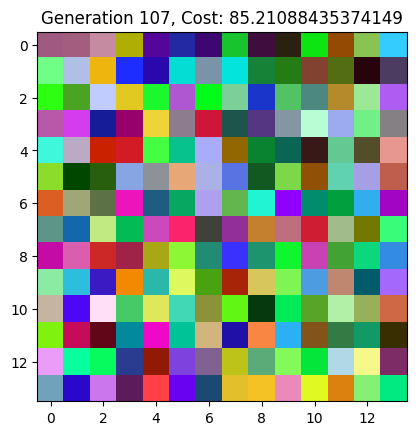

Best Solution for iteration 107 has cost of 85.21088435374149
0
250


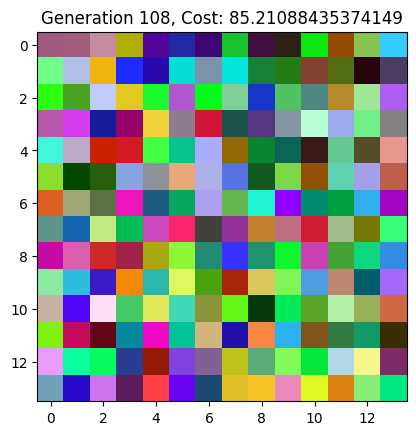

Best Solution for iteration 108 has cost of 85.21088435374149
0
250


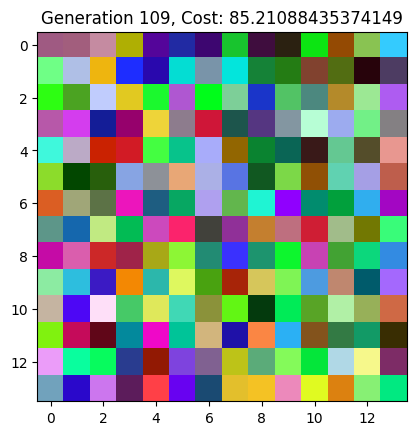

Best Solution for iteration 109 has cost of 85.21088435374149
0
250


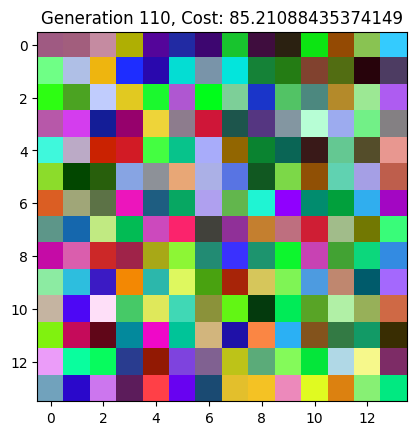

Best Solution for iteration 110 has cost of 85.21088435374149
0
250


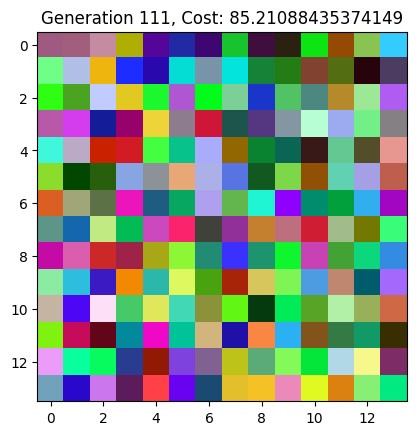

Best Solution for iteration 111 has cost of 85.21088435374149
0
250


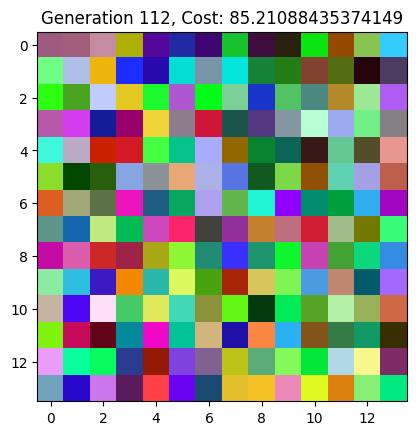

Best Solution for iteration 112 has cost of 85.21088435374149
0
250


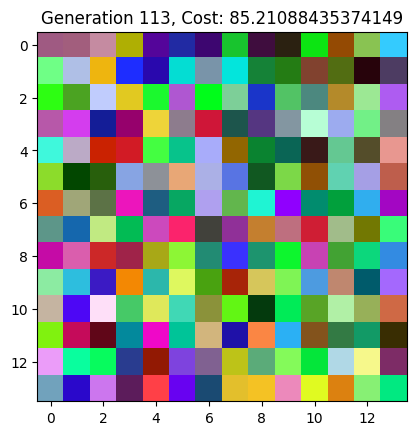

Best Solution for iteration 113 has cost of 85.21088435374149
0
250


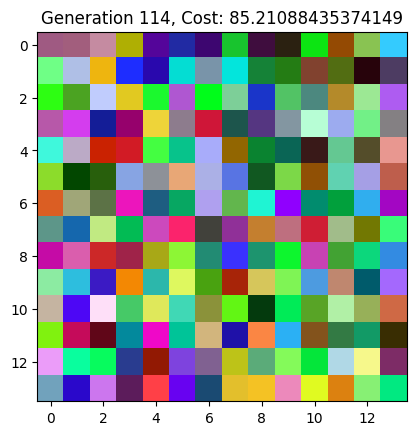

Best Solution for iteration 114 has cost of 85.21088435374149
0
250


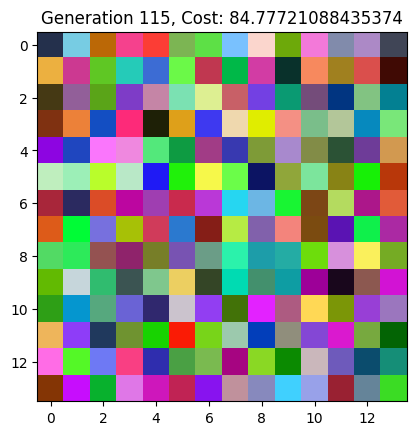

Best Solution for iteration 115 has cost of 84.77721088435374
0
250


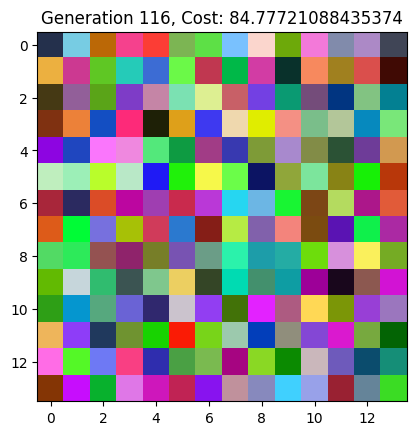

Best Solution for iteration 116 has cost of 84.77721088435374
0
250


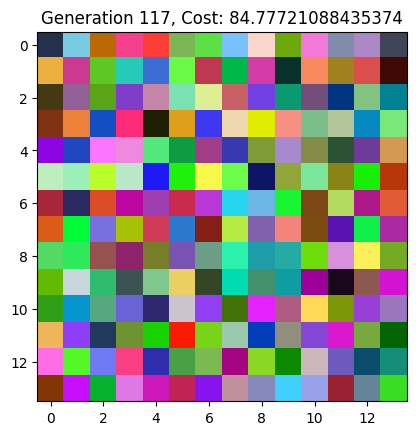

Best Solution for iteration 117 has cost of 84.77721088435374
0
250


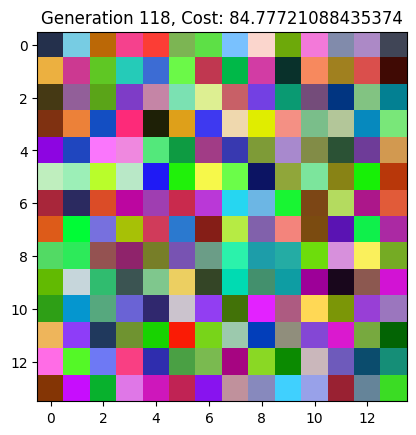

Best Solution for iteration 118 has cost of 84.77721088435374
0
250


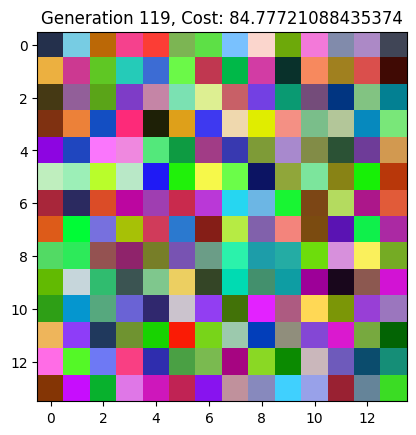

Best Solution for iteration 119 has cost of 84.77721088435374
0
250


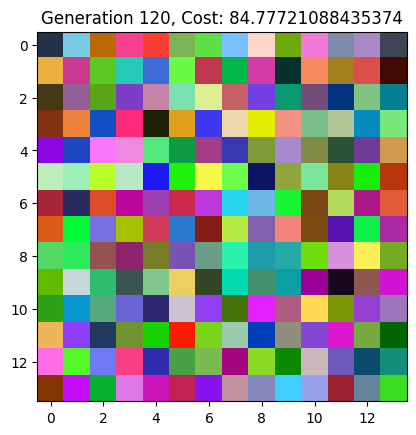

Best Solution for iteration 120 has cost of 84.77721088435374
0
250


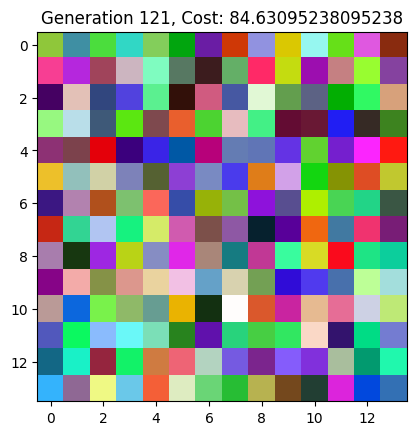

Best Solution for iteration 121 has cost of 84.63095238095238
0
250


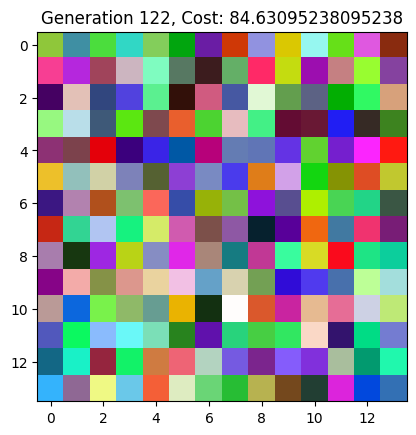

Best Solution for iteration 122 has cost of 84.63095238095238
0
250


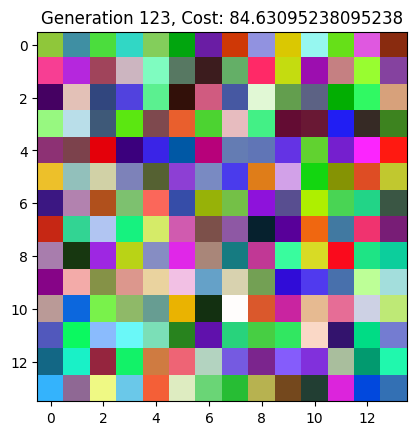

Best Solution for iteration 123 has cost of 84.63095238095238
0
250


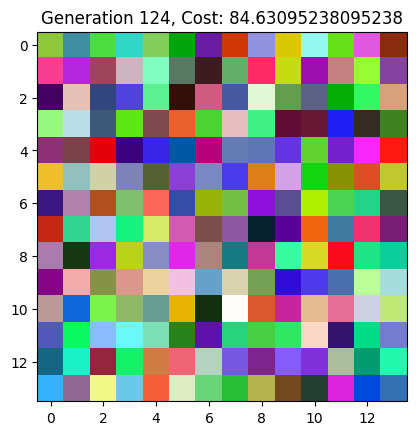

Best Solution for iteration 124 has cost of 84.63095238095238
0
250


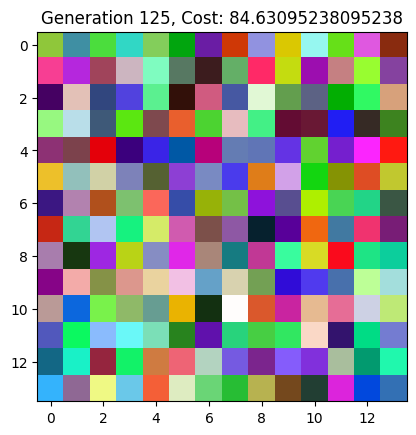

Best Solution for iteration 125 has cost of 84.63095238095238
0
250


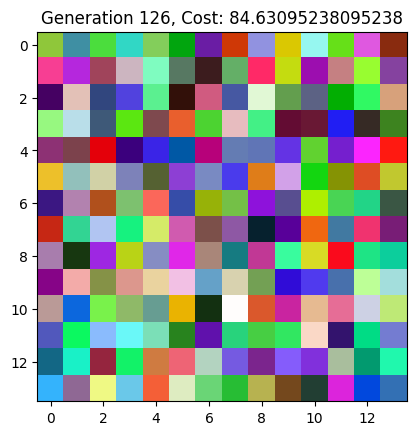

Best Solution for iteration 126 has cost of 84.63095238095238
0
250


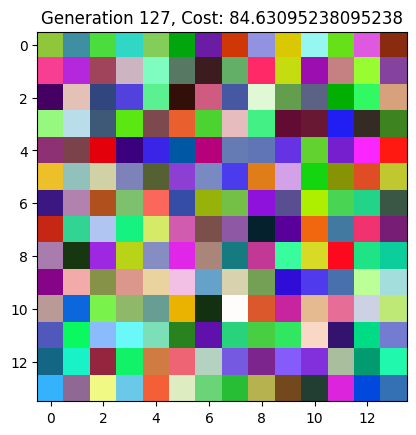

Best Solution for iteration 127 has cost of 84.63095238095238
0
250


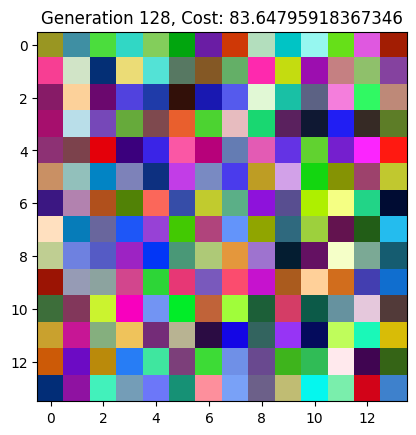

Best Solution for iteration 128 has cost of 83.64795918367346
0
250


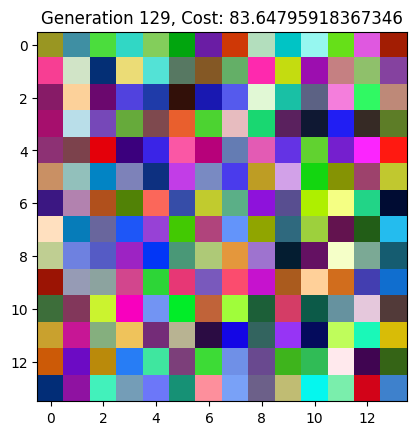

Best Solution for iteration 129 has cost of 83.64795918367346
0
250


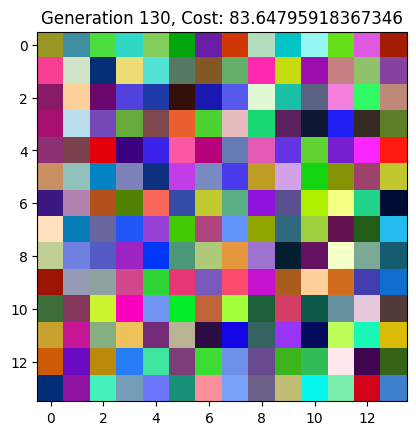

Best Solution for iteration 130 has cost of 83.64795918367346
0
250


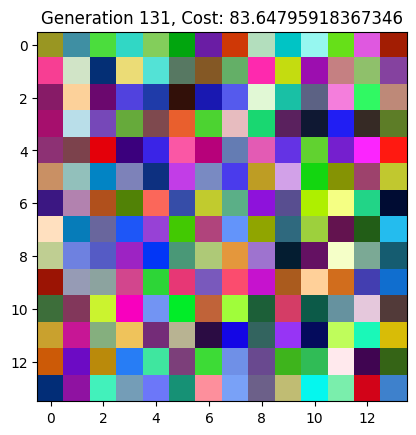

Best Solution for iteration 131 has cost of 83.64795918367346
0
250


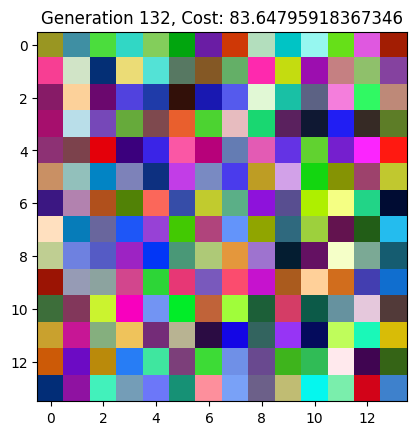

Best Solution for iteration 132 has cost of 83.64795918367346
0
250


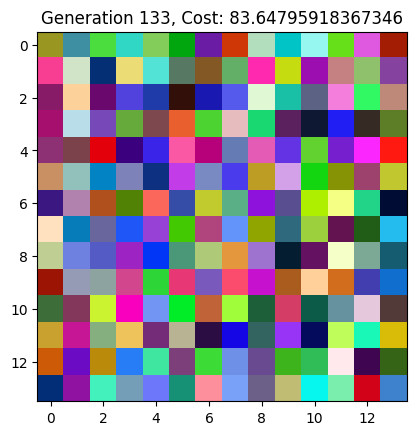

Best Solution for iteration 133 has cost of 83.64795918367346
0
250


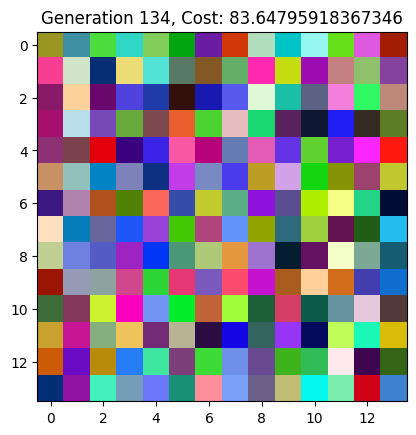

Best Solution for iteration 134 has cost of 83.64795918367346
0
250


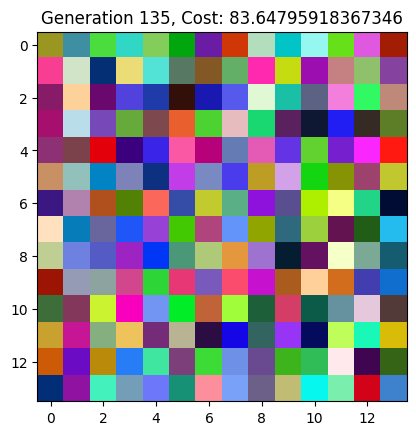

Best Solution for iteration 135 has cost of 83.64795918367346
0
250


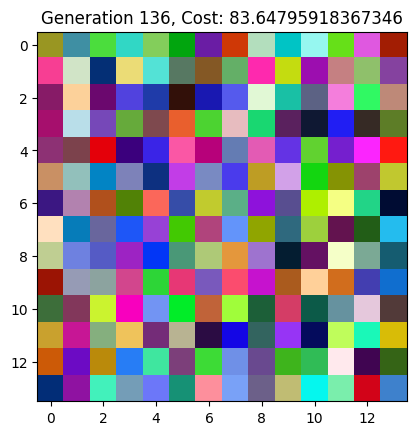

Best Solution for iteration 136 has cost of 83.64795918367346
0
250


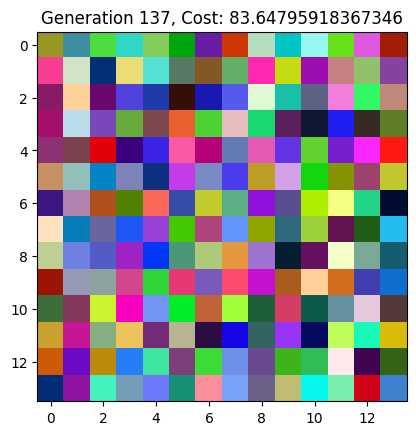

Best Solution for iteration 137 has cost of 83.64795918367346
0
250


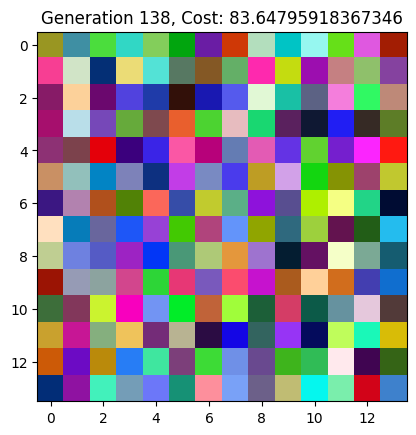

Best Solution for iteration 138 has cost of 83.64795918367346
0
250


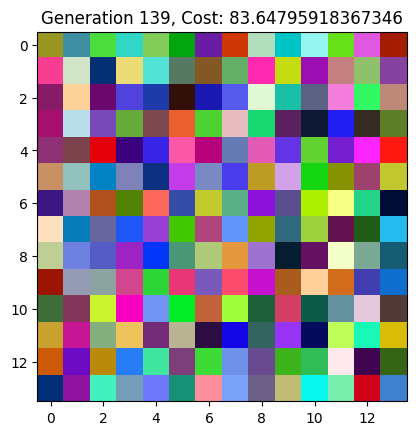

Best Solution for iteration 139 has cost of 83.64795918367346
0
250


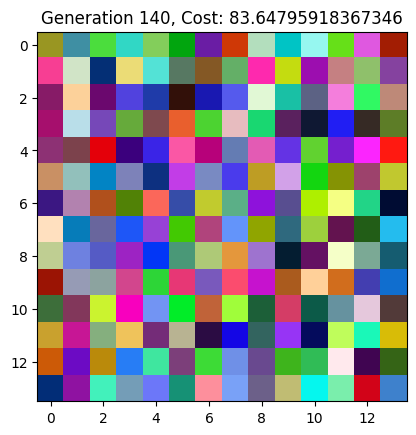

Best Solution for iteration 140 has cost of 83.64795918367346
0
250


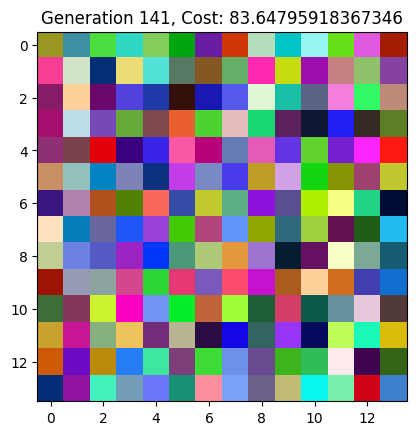

Best Solution for iteration 141 has cost of 83.64795918367346
0
250


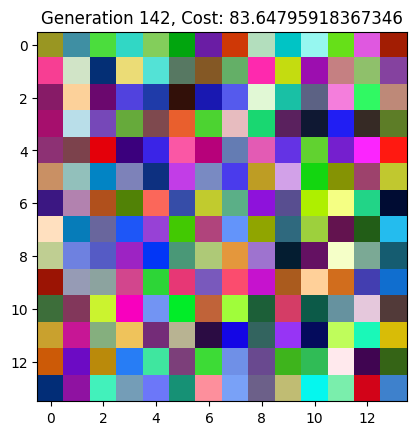

Best Solution for iteration 142 has cost of 83.64795918367346
0
250


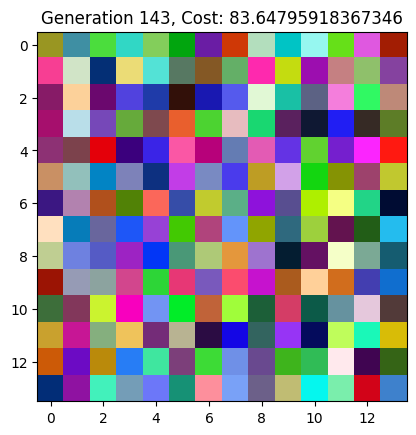

Best Solution for iteration 143 has cost of 83.64795918367346
0
250


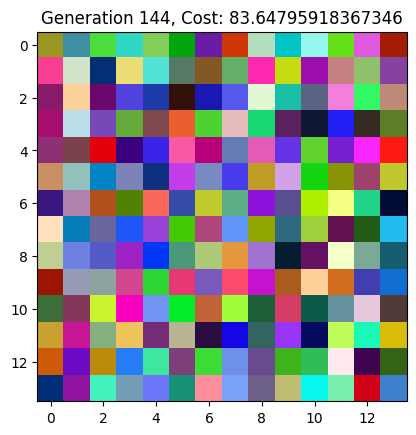

Best Solution for iteration 144 has cost of 83.64795918367346
0
250


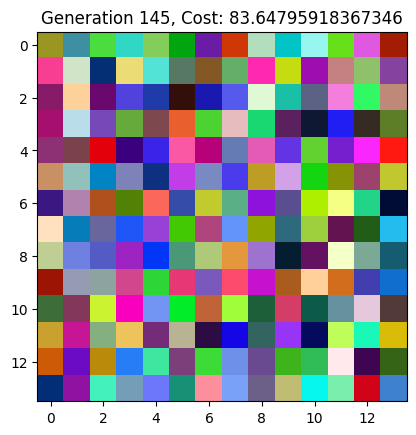

Best Solution for iteration 145 has cost of 83.64795918367346
0
250


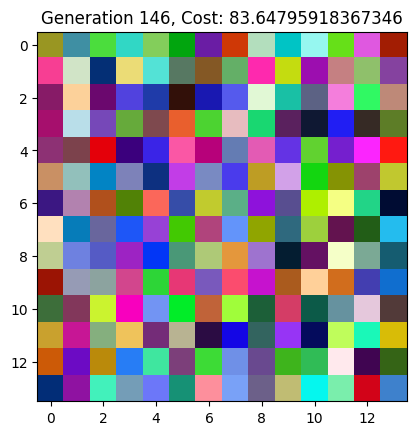

Best Solution for iteration 146 has cost of 83.64795918367346
0
250


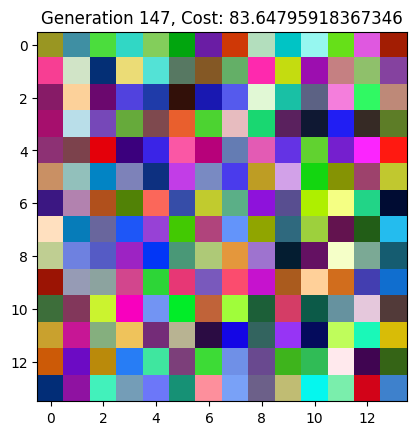

Best Solution for iteration 147 has cost of 83.64795918367346
0
250


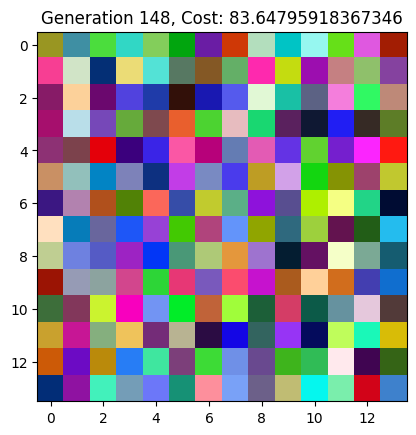

Best Solution for iteration 148 has cost of 83.64795918367346
0
250


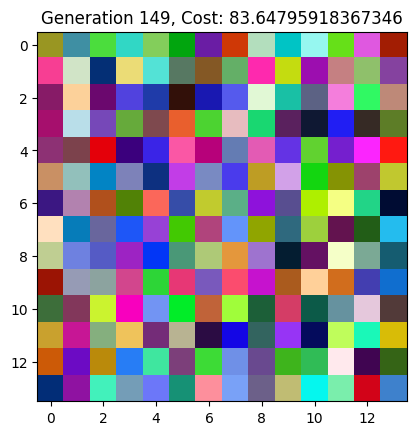

Best Solution for iteration 149 has cost of 83.64795918367346
0
250


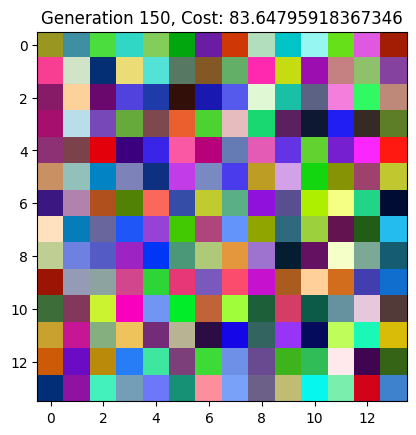

Best Solution for iteration 150 has cost of 83.64795918367346
0
250


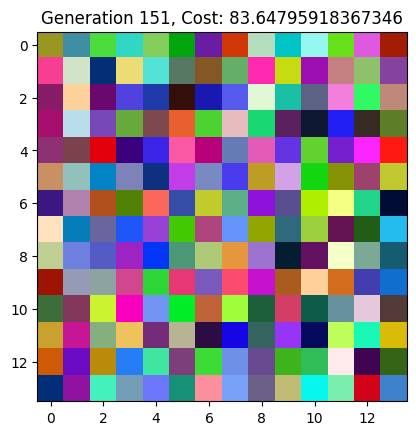

Best Solution for iteration 151 has cost of 83.64795918367346
0
250


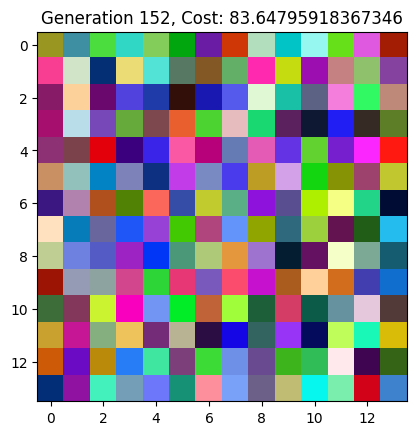

Best Solution for iteration 152 has cost of 83.64795918367346
0
250


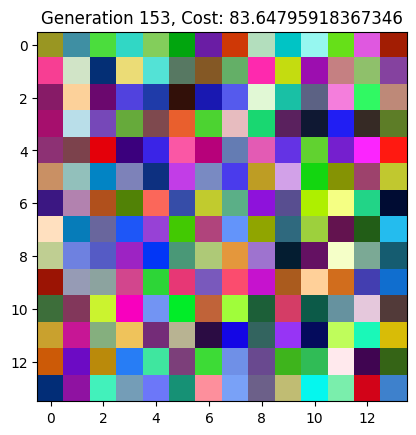

Best Solution for iteration 153 has cost of 83.64795918367346
0
250


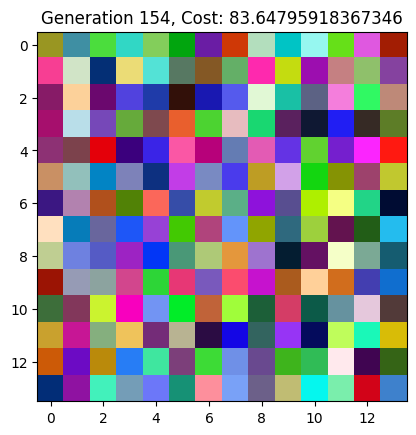

Best Solution for iteration 154 has cost of 83.64795918367346
0
250


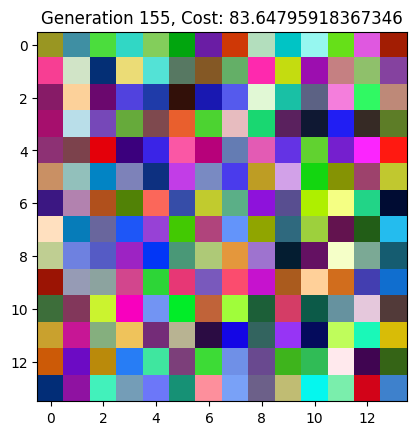

Best Solution for iteration 155 has cost of 83.64795918367346
0
250


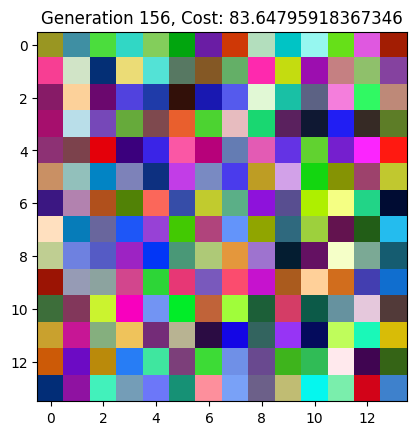

Best Solution for iteration 156 has cost of 83.64795918367346
0
250


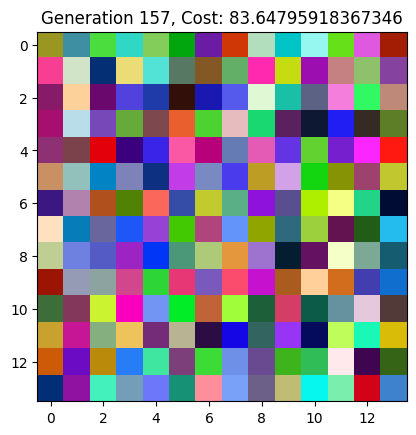

Best Solution for iteration 157 has cost of 83.64795918367346
0
250


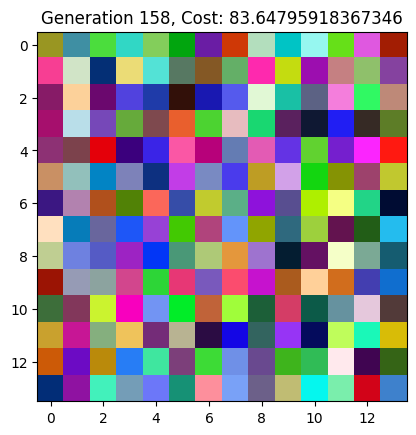

Best Solution for iteration 158 has cost of 83.64795918367346
0
250


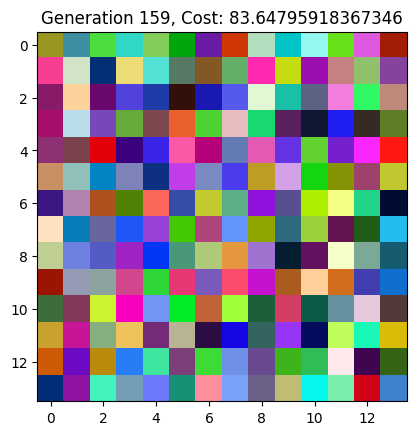

Best Solution for iteration 159 has cost of 83.64795918367346
0
250


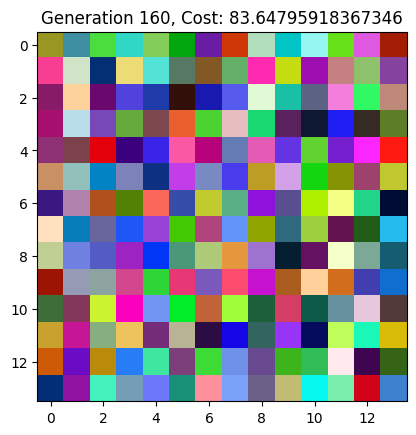

Best Solution for iteration 160 has cost of 83.64795918367346
0
250


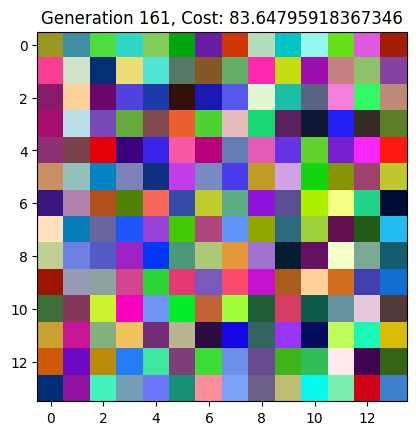

Best Solution for iteration 161 has cost of 83.64795918367346
0
250


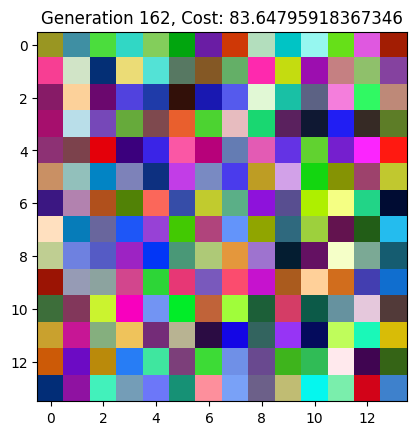

Best Solution for iteration 162 has cost of 83.64795918367346
0
250


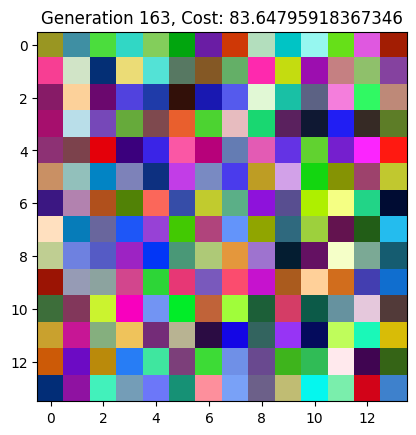

Best Solution for iteration 163 has cost of 83.64795918367346
0
250


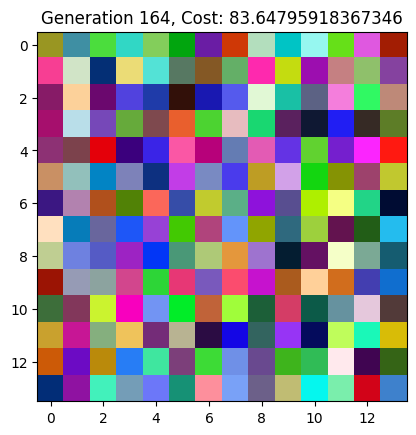

Best Solution for iteration 164 has cost of 83.64795918367346
0
250


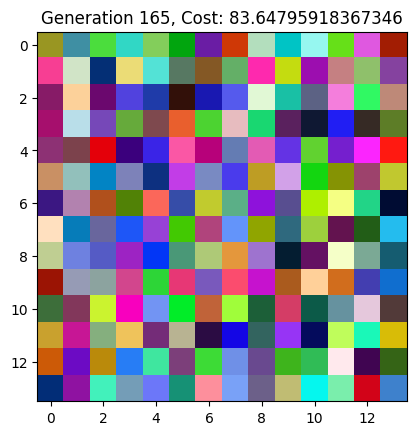

Best Solution for iteration 165 has cost of 83.64795918367346
0
250


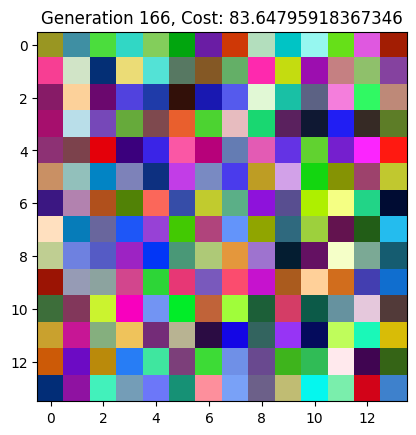

Best Solution for iteration 166 has cost of 83.64795918367346
0
250


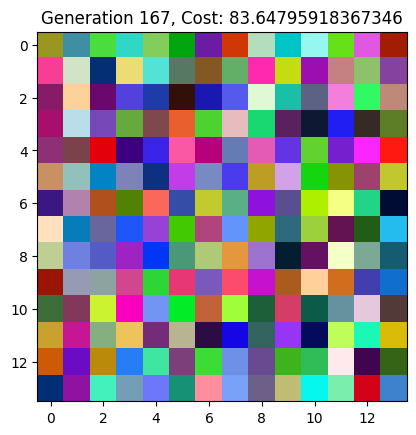

Best Solution for iteration 167 has cost of 83.64795918367346
0
250


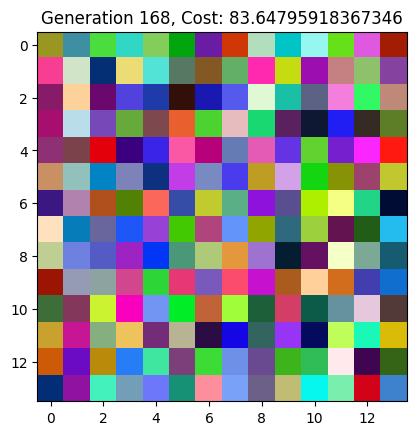

Best Solution for iteration 168 has cost of 83.64795918367346
0
250


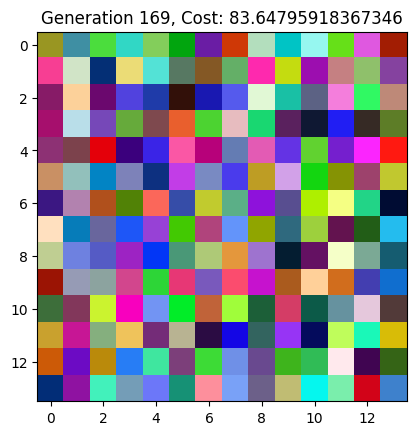

Best Solution for iteration 169 has cost of 83.64795918367346
0
250


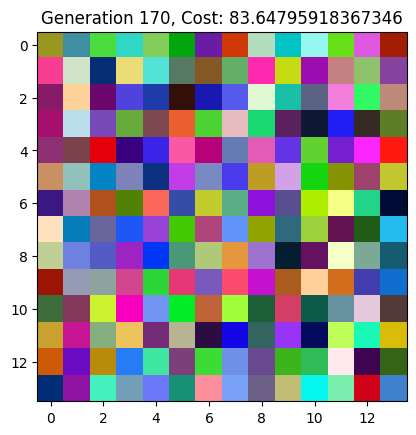

Best Solution for iteration 170 has cost of 83.64795918367346
0
250


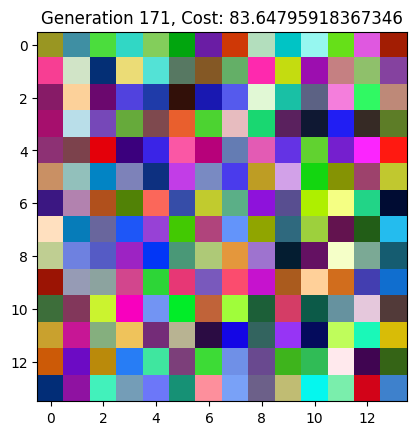

Best Solution for iteration 171 has cost of 83.64795918367346
0
250


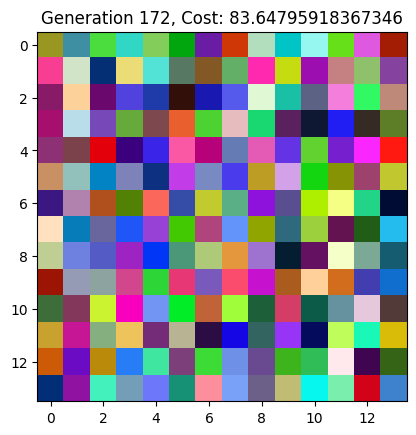

Best Solution for iteration 172 has cost of 83.64795918367346
0
250


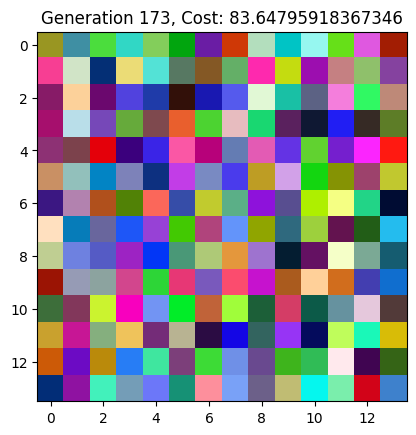

Best Solution for iteration 173 has cost of 83.64795918367346
0
250


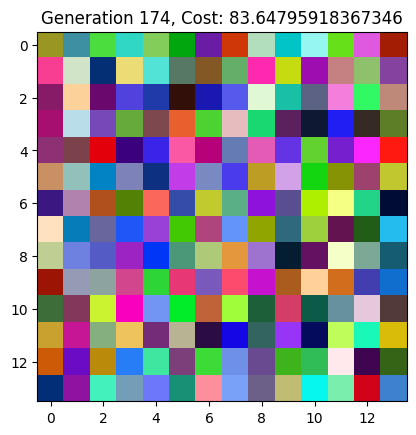

Best Solution for iteration 174 has cost of 83.64795918367346
0
250


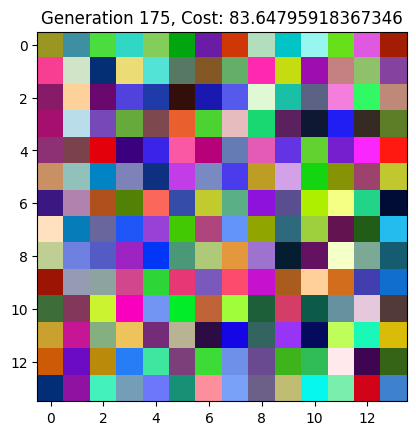

Best Solution for iteration 175 has cost of 83.64795918367346
0
250


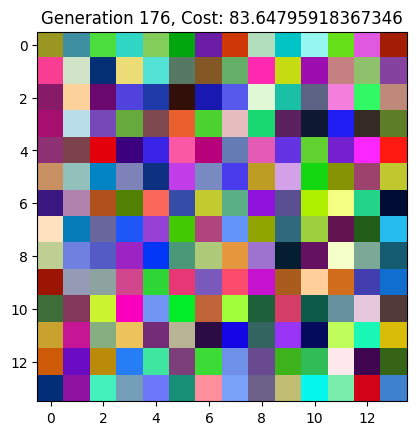

Best Solution for iteration 176 has cost of 83.64795918367346
0
250


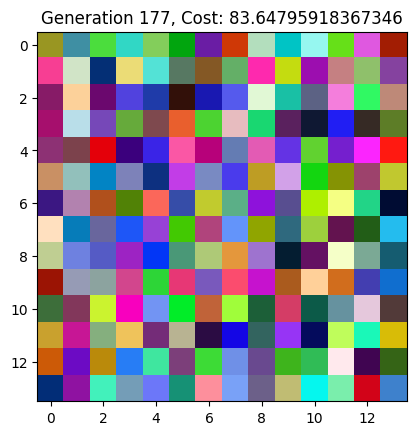

Best Solution for iteration 177 has cost of 83.64795918367346
0
250


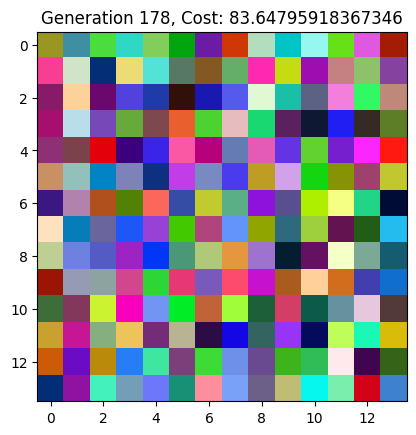

Best Solution for iteration 178 has cost of 83.64795918367346
0
250


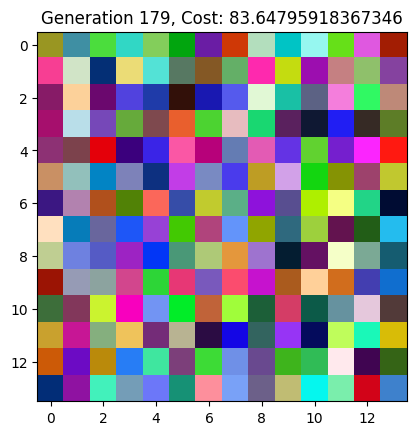

Best Solution for iteration 179 has cost of 83.64795918367346
0
250


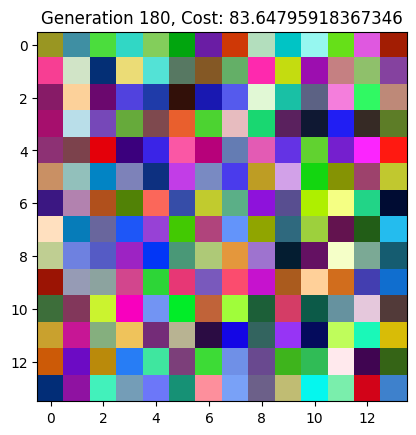

Best Solution for iteration 180 has cost of 83.64795918367346
0
250


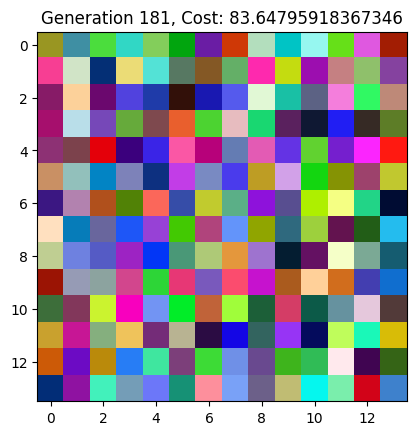

Best Solution for iteration 181 has cost of 83.64795918367346
0
250


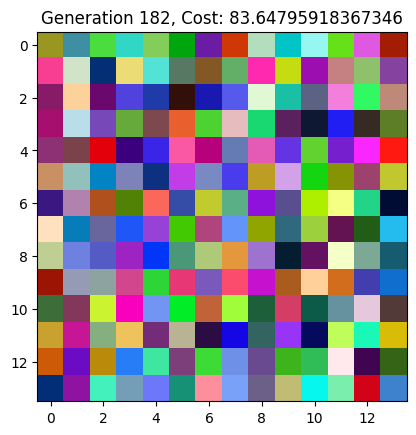

Best Solution for iteration 182 has cost of 83.64795918367346
0
250


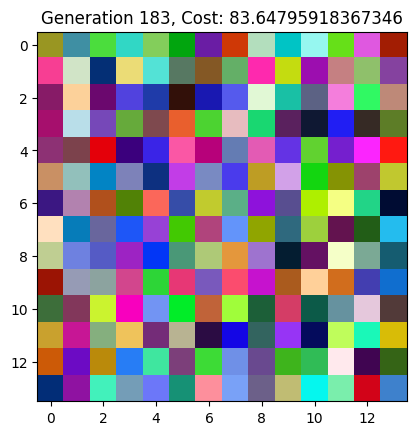

Best Solution for iteration 183 has cost of 83.64795918367346
0
250


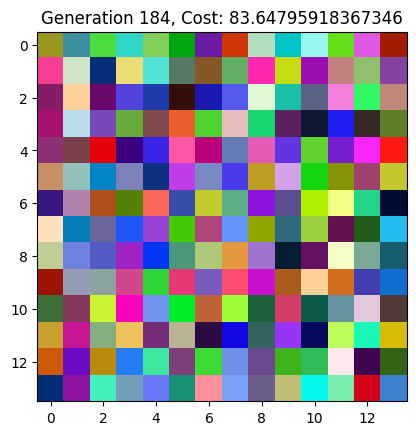

Best Solution for iteration 184 has cost of 83.64795918367346
0
250


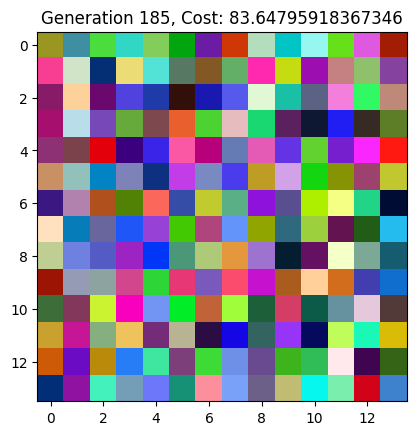

Best Solution for iteration 185 has cost of 83.64795918367346
0
250


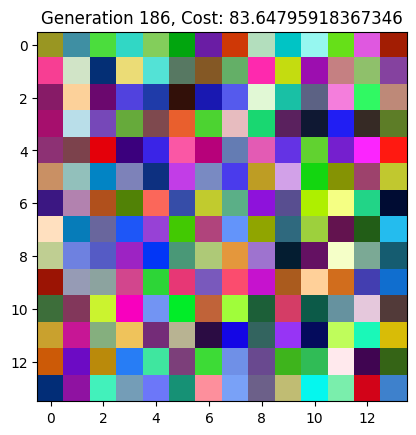

Best Solution for iteration 186 has cost of 83.64795918367346
0
250


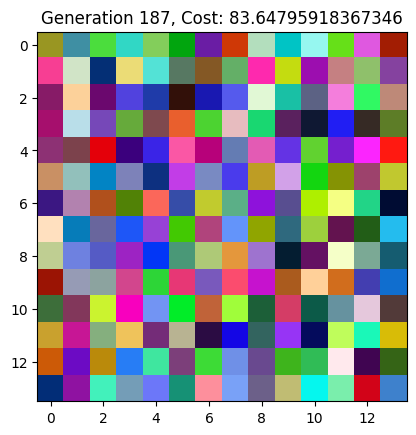

Best Solution for iteration 187 has cost of 83.64795918367346
0
250


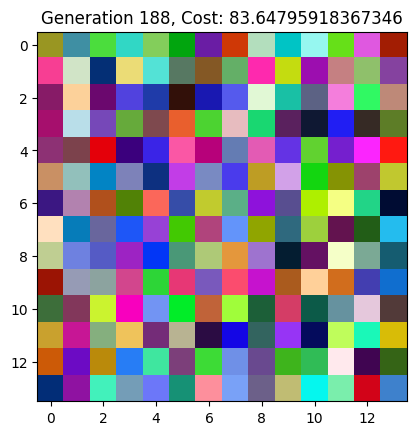

Best Solution for iteration 188 has cost of 83.64795918367346
0
250


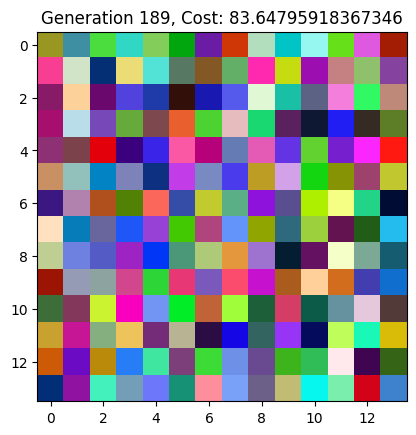

Best Solution for iteration 189 has cost of 83.64795918367346
0
250


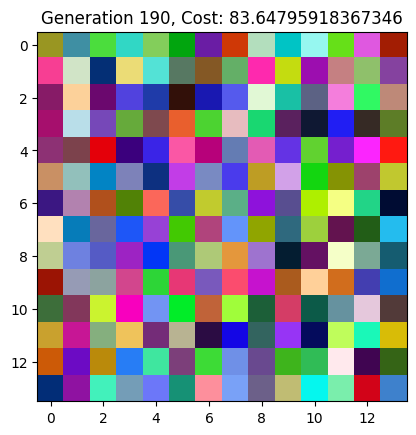

Best Solution for iteration 190 has cost of 83.64795918367346
0
250


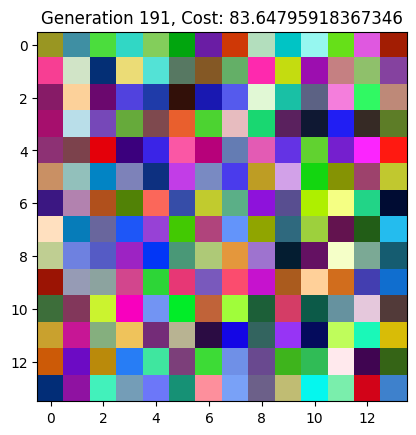

Best Solution for iteration 191 has cost of 83.64795918367346
0
250


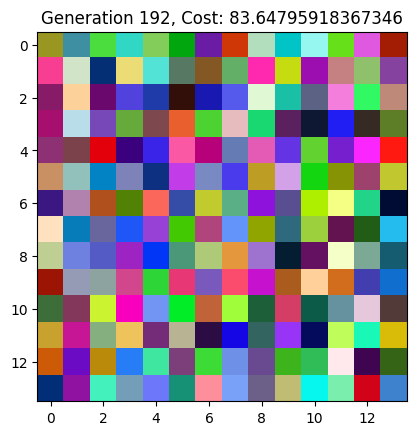

Best Solution for iteration 192 has cost of 83.64795918367346
0
250


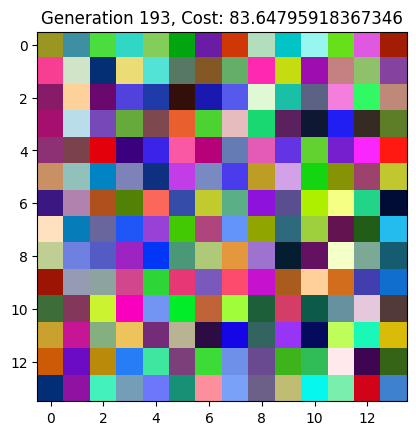

Best Solution for iteration 193 has cost of 83.64795918367346
0
250


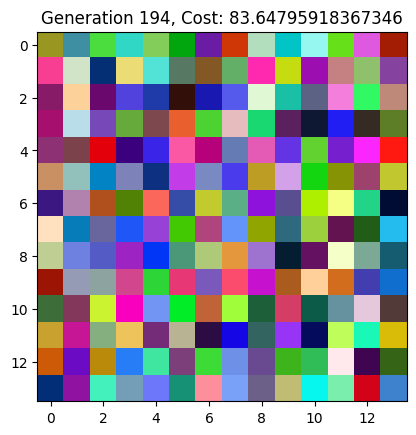

Best Solution for iteration 194 has cost of 83.64795918367346
0
250


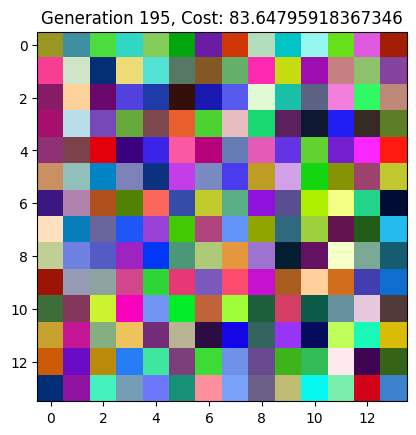

Best Solution for iteration 195 has cost of 83.64795918367346
0
250


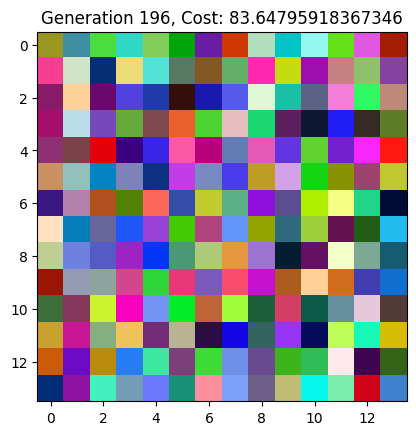

Best Solution for iteration 196 has cost of 83.64795918367346
0
250


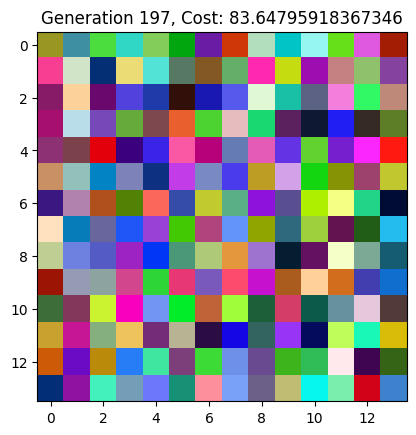

Best Solution for iteration 197 has cost of 83.64795918367346
0
250


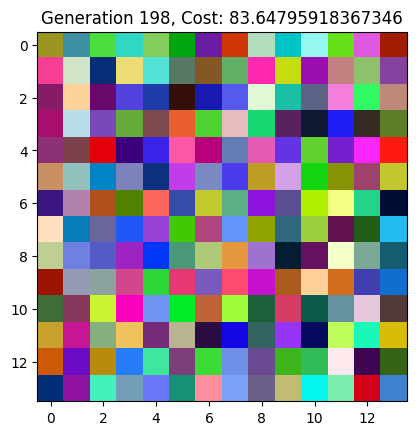

Best Solution for iteration 198 has cost of 83.64795918367346
0
250


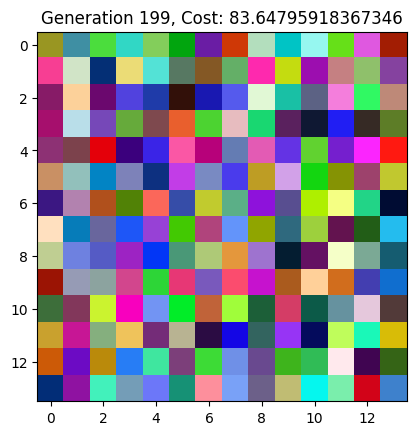

Best Solution for iteration 199 has cost of 83.64795918367346


In [138]:
#  Running of the algorithm with outputs here
p1 = problem()
b1 = run_genetic(p1, params)

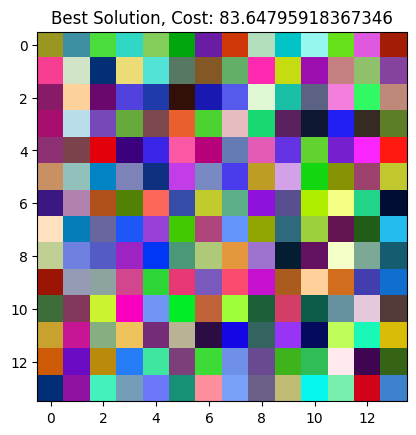

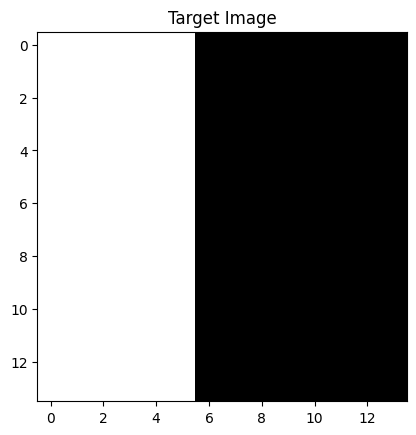

In [139]:
plt.imshow(b1.chromosome)
plt.title(f"Best Solution, Cost: {b1.cost}")
plt.show()

plt.imshow(target_image)
plt.title("Target Image")
plt.show()

In [ ]:
#  If changes to params or reruns of iterations dont overwrite, create more cells and copy code down to show evolution of final solution

## Results and conclusions    **(~10%)**

---

(Double click then ...)  Type Here...

---

